# Regression Project
# Southern California Single Unit Properties

## Import Libraries

In [1]:
#Disable warnings
import warnings
warnings.filterwarnings("ignore")

#Libraries for processing data
import pandas as pd
import numpy as np

#Import libraries for graphing
import matplotlib.pyplot as plt
import seaborn as sns

#Libraries for obtaining data from SQL databse
import env
import os

#Library for statistical testing
from scipy import stats

#sklearn imports 
from sklearn.linear_model import LinearRegression, LassoLars, TweedieRegressor
from sklearn.feature_selection import SelectKBest, f_regression, RFE
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error

#Import libaries to acquire and prepare the data
from acquire import wrangle_zillow
from acquire import remove_outliers
from prep import clean_data

## Acquire

We use our `acquire.py` function to obtain the Zillow data. We obtain the information for single-unit homes in Los Angeles, Orange, and Ventura County whose sale transaction date falls within May 1, 2017 and August 31, 2017.

For more information about the data we are acquiring, please see the `acquire.py` file in this repository. 

In [2]:
#Obtain the data
zillow = wrangle_zillow()

In [3]:
#Get sample of the data
zillow.head()

,bedroomcnt,bathroomcnt,calculatedfinishedsquarefeet,taxvaluedollarcnt,yearbuilt,taxamount,fips
0,3.0,2.0,1125.0,289445.0,1974.0,3490.16,6059.0
1,3.0,2.0,1316.0,205123.0,1923.0,2627.48,6037.0
2,3.0,2.0,1458.0,136104.0,1970.0,2319.90,6037.0
3,3.0,2.0,1766.0,810694.0,1980.0,9407.01,6037.0
4,2.0,1.0,1421.0,35606.0,1911.0,543.69,6037.0


In [4]:
#Get DataFrame info
zillow.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36980 entries, 0 to 38597
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   bedroomcnt                    36980 non-null  float64
 1   bathroomcnt                   36980 non-null  float64
 2   calculatedfinishedsquarefeet  36980 non-null  float64
 3   taxvaluedollarcnt             36980 non-null  float64
 4   yearbuilt                     36980 non-null  float64
 5   taxamount                     36980 non-null  float64
 6   fips                          36980 non-null  float64
dtypes: float64(7)
memory usage: 2.3 MB


In [5]:
#Describe DataFrame
zillow.describe()

,bedroomcnt,bathroomcnt,calculatedfinishedsquarefeet,taxvaluedollarcnt,yearbuilt,taxamount,fips
count,36980.000000,36980.000000,36980.000000,3.698000e+04,36980.000000,36980.000000,36980.000000
mean,2.962872,2.187872,1660.080615,4.081403e+05,1969.209366,5012.971896,6050.087615
std,0.984314,0.807259,706.813724,2.839327e+05,22.711047,3294.148678,21.615272
min,0.000000,0.000000,240.000000,1.000000e+03,1878.000000,19.920000,6037.000000
25%,2.000000,2.000000,1159.000000,2.019285e+05,1954.000000,2645.645000,6037.000000
50%,3.000000,2.000000,1494.000000,3.501410e+05,1970.000000,4313.600000,6037.000000
75%,4.000000,3.000000,1994.250000,5.409200e+05,1986.000000,6546.525000,6059.000000
max,9.000000,5.500000,4726.000000,1.630022e+06,2016.000000,18365.680000,6111.000000


### Visualize Distributions

We will now graph the distributions and the boxplots for each of our features. 

In [6]:
#We will set our palette to bright, so that our graphs are easier to see.
sns.set_palette("bright")

### Bedroom Count

#### Distribution

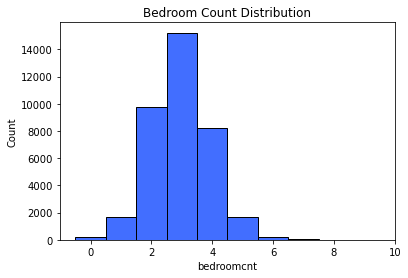

In [7]:
bedroom_count_distribution = sns.histplot(data=zillow, x="bedroomcnt", discrete = True).set(Title = "Bedroom Count Distribution")

#### Boxplot

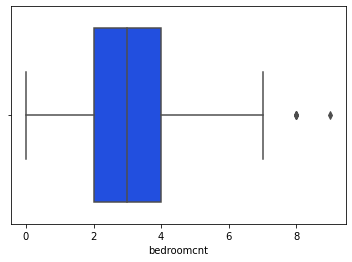

In [8]:
bedroom_count_boxplot = sns.boxplot(x=zillow["bedroomcnt"])

### Bathroom Count

#### Distribution

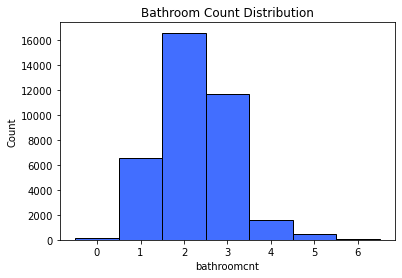

In [9]:
bathroom_count_distribution = sns.histplot(data=zillow, x="bathroomcnt", discrete = True).set(Title = "Bathroom Count Distribution")

#### Boxplot

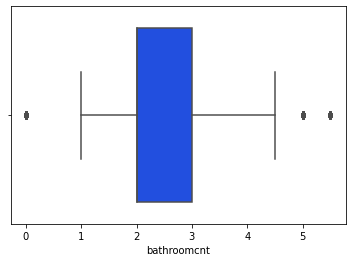

In [10]:
bathroom_count_boxplot = sns.boxplot(x=zillow["bathroomcnt"])

### Square Feet

#### Distribution

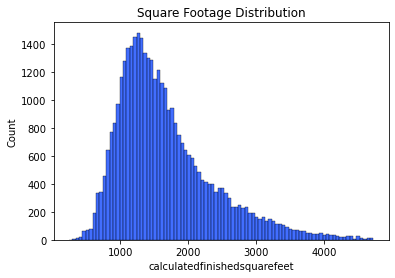

In [11]:
square_feet_distribution = sns.histplot(data=zillow, x="calculatedfinishedsquarefeet").set(Title = "Square Footage Distribution")

#### Boxplot

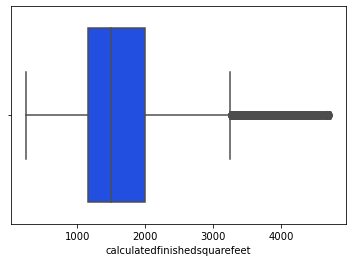

In [12]:
square_feet_boxplot = sns.boxplot(x=zillow["calculatedfinishedsquarefeet"])

### Tax Value

#### Distribution

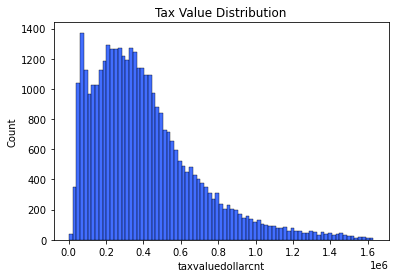

In [13]:
tax_value_distribution = sns.histplot(data = zillow, x = "taxvaluedollarcnt").set(Title = "Tax Value Distribution")

#### Boxplot

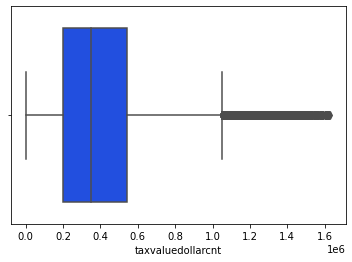

In [14]:
tax_value_boxplot = sns.boxplot(x=zillow["taxvaluedollarcnt"])

### Tax Amount

#### Distribution

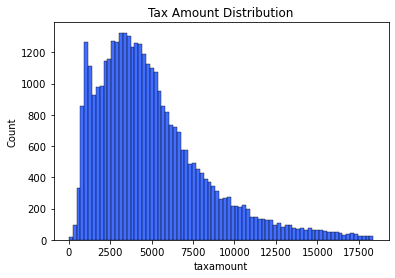

In [15]:
tax_amount_distribution = sns.histplot(data = zillow, x = "taxamount").set(Title = "Tax Amount Distribution")

#### Boxplot

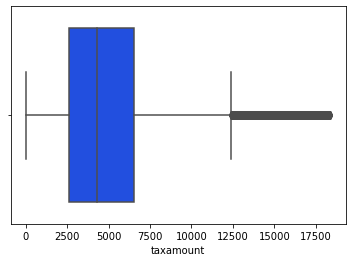

In [16]:
tax_amount_boxplot = sns.boxplot(x=zillow["taxamount"])

### Year Built

#### Distribution

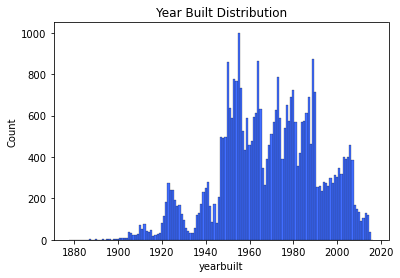

In [17]:
yearbuilt_graph = sns.histplot(data=zillow, x="yearbuilt", discrete = True).set(Title = "Year Built Distribution")

#### Boxplot

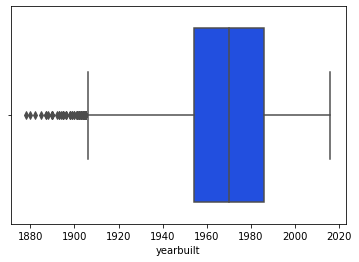

In [18]:
yearbuilt_boxplot = sns.boxplot(x=zillow["yearbuilt"])

### FIPS Code

### Countplot

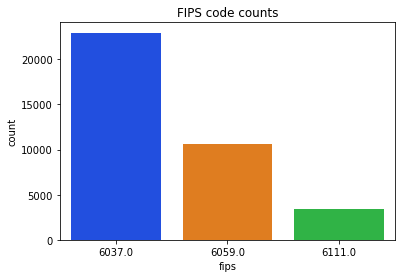

In [19]:
fips_graph = sns.countplot(data = zillow, x ="fips").set(Title = "FIPS code counts")

### Key Takeaways

 - All of our columns are numeric. 
 - The columns `bedroomcnt`, `bathroomcnt`, `calculatedfinishedsquarefeet`, `taxvaluedollarcnt`, and `taxamount` are continuous. 
 - The columns `yearbuilt` and `fips` are categorical.
 - The distributions of `taxvaluedollarcnt` and `taxamount` are very similar. The feature `taxamount` is likely derived from `taxvaluedollarcnt`.
 - The FIPS code 6037 indicates Los Angeles County. The FIPS code 6059 indicates Orange County. The FIPS code 6111 indicates Ventura County. 
 - Los Angeles County has by far the most property sales, followed by Orange County, then Ventura. 
 - The distribution of all of features is roughly normal.

## Prepare

We utilize the `clean_data` function which we obtained from the `prep.py` file to clean the data. The function `clean_data` performs two functions:
 - split the data into `train`, `validate`, and `test` datasets.
 - scale the columns `bedroomcnt`, `bathroomcnt`, and `calculatedfinishedsquarefeet` using the min max scaler. This scaler maps the values in each of these columns to a value between 0 and 1. 
 
For more information about the `clean_data` function please see the `prep.py` file in this repository.

In [20]:
#prepare the data
train, validate, test = clean_data(zillow)

In [21]:
#take a sample of the new train dataset
train.head()

,bedroomcnt,bathroomcnt,calculatedfinishedsquarefeet,taxvaluedollarcnt,yearbuilt,taxamount,fips,calculatedfinishedsquarefeet_scaled,bedroomcnt_scaled,bathroomcnt_scaled
8266,4.0,2.0,1919.0,286663.0,2009.0,5219.87,6037.0,0.374276,0.444444,0.363636
18949,2.0,2.5,1258.0,64609.0,1978.0,803.16,6111.0,0.226928,0.222222,0.454545
22247,4.0,3.0,1657.0,210212.0,1987.0,3411.70,6037.0,0.315872,0.444444,0.545455
7526,2.0,3.0,1684.0,237037.0,1992.0,2984.05,6037.0,0.321890,0.222222,0.545455
17592,4.0,4.5,3932.0,1094525.0,2000.0,13409.66,6111.0,0.823005,0.444444,0.818182


### Key Takeaways

 - We split the data into `train`, `validate`, and `test` datasets. 
 - We created new scaled columns for `bedroomcnt`, `bathroomcnt`, and `calculatedfinishedsquarefeet` using the min max scaler. 

## Data Exploration

To explore the data we will graph relationships between different features in the data. We will also use hypothesis testing to gather more information about the relationships between features in the data.

### Pairplot

To begin with, we will create a pairplot of the data. We will eliminate the columns `bedroomcnt`, `bathroomcnt`, and `calculatedfinishedsquarefeet` because we are only interested in the scaled versions of these columns. The scaled data is easier to visualize on a graph.

In [22]:
#Drop the unscaled columns
train_scaled = train.drop(columns = ['bedroomcnt', 'bathroomcnt', 'calculatedfinishedsquarefeet'])

In [23]:
#Function that produces a pairplot
def plot_variable_pairs(df):
    g = sns.pairplot(df, kind="reg", corner=True, plot_kws={'line_kws':{'color':'red'}})
    return g

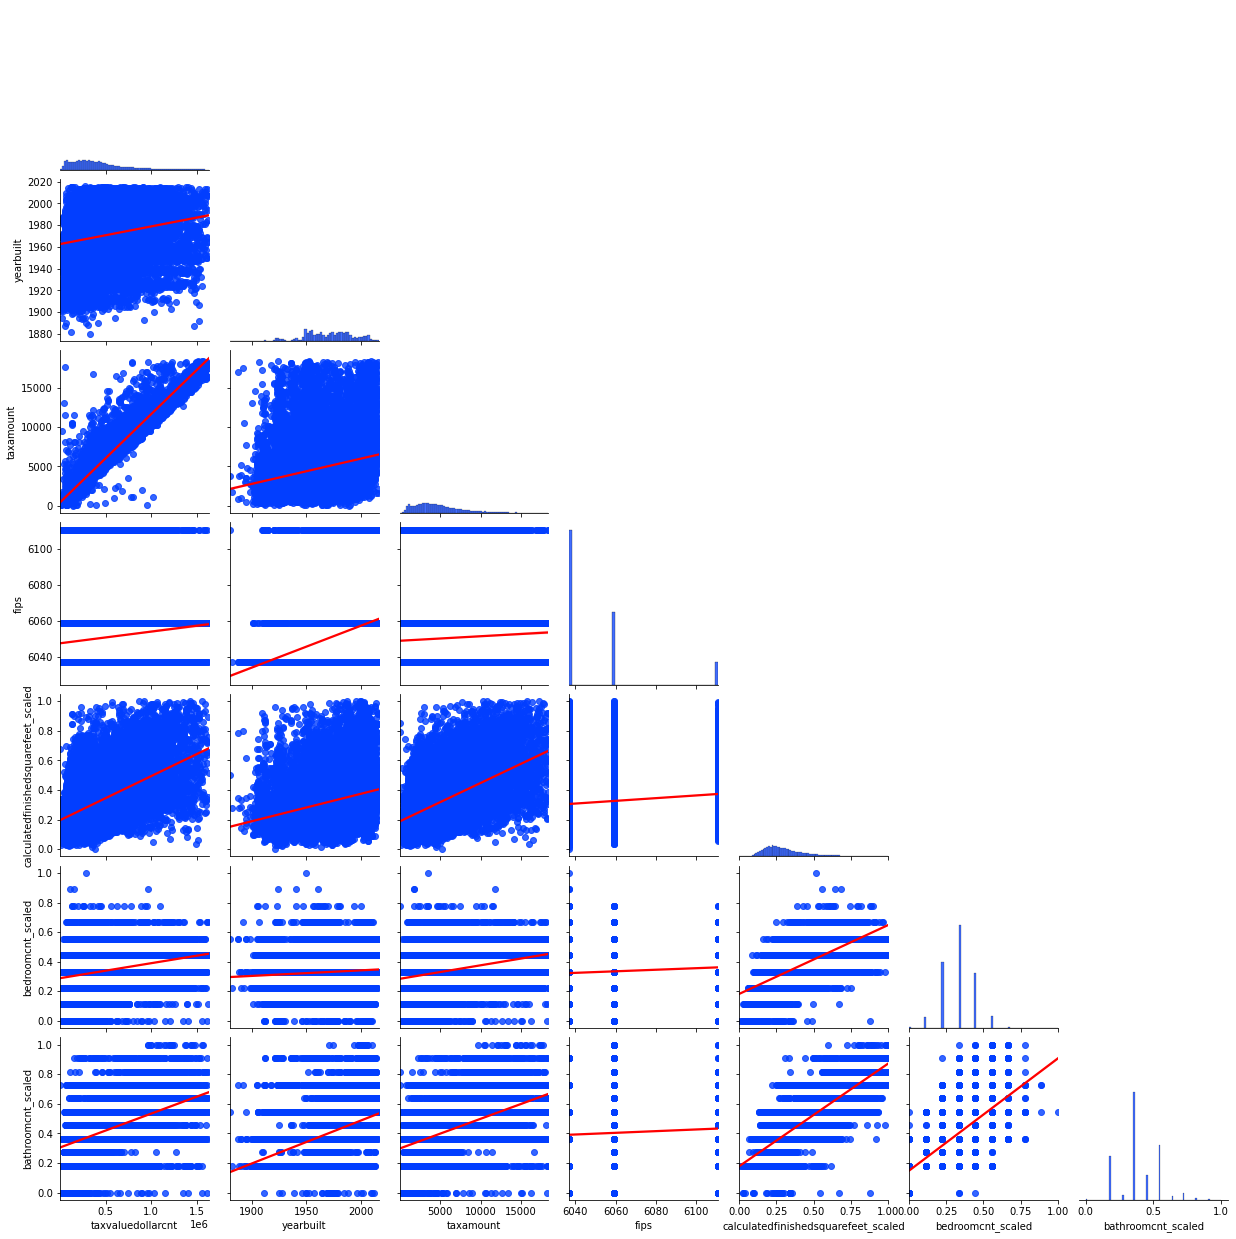

In [24]:
#Pairplot of the scaled data
plot_variable_pairs(train_scaled)

### Plotting Categorical vs. Continuous Features

Now we will explore the data by plotting each of the categorical variables with each of the continuous variables. Our cateogircal and continuous variables are defined below:

In [25]:
categorical = ['fips', 'yearbuilt']
continuous = ['bedroomcnt_scaled', 'bathroomcnt_scaled', 'calculatedfinishedsquarefeet_scaled', 'taxvaluedollarcnt', 'taxamount']

For each relationship between categorical and continuous variables, we will create three graphs: swarmplot, stripplot, and barplot. We create a function below that loops through our categorical and continuous features to create these graphs. 

In [26]:
def plot_categorical_and_continuous_vars(train_scaled, categorical, continuous):
    #Loop through categorical features
    for col1 in categorical:
        #Loop through continuous features
        for col2 in continuous:
            #Set figure size
            plt.figure(figsize=(22, 12))
            #Create graph
            a = sns.swarmplot(x=train_scaled[col1], y=train_scaled[col2], data=train_scaled)
    #Loop through categorical features
    for col1 in categorical:
        #Loop through continuous features
        for col2 in continuous:
            #Set figure size
            plt.figure(figsize=(22, 12))
            #Create graph
            b = sns.stripplot(x=train_scaled[col1], y=train_scaled[col2], data=train_scaled)      
    #Loop through categorical features
    for col1 in categorical:
        #Loop through continuous features
        for col2 in continuous:
            #Set figure size
            plt.figure(figsize=(22, 12))
            #Create graph
            c = sns.barplot(x=train_scaled[col1], y=train_scaled[col2], data=train_scaled)
    return a, b, c

Because our dataset is so large, we take a sample of 1000 elements of our dataset. 

(<AxesSubplot:xlabel='yearbuilt', ylabel='taxamount'>,
 <AxesSubplot:xlabel='yearbuilt', ylabel='taxamount'>,
 <AxesSubplot:xlabel='yearbuilt', ylabel='taxamount'>)

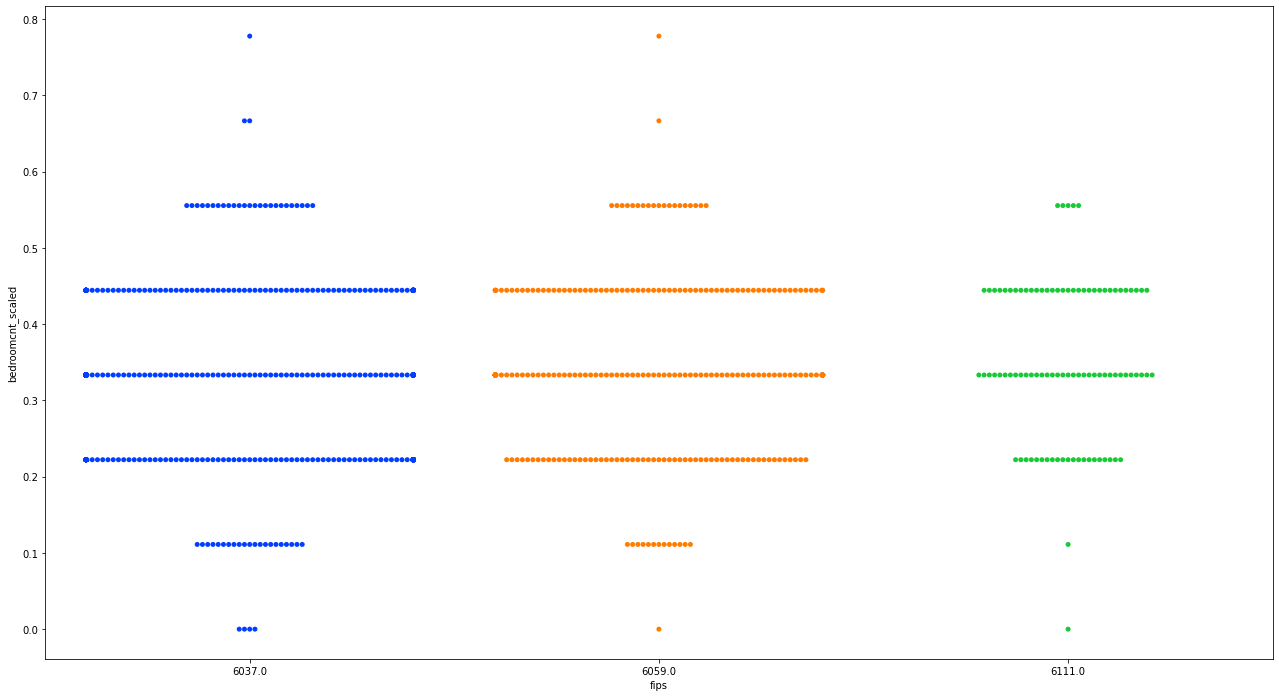

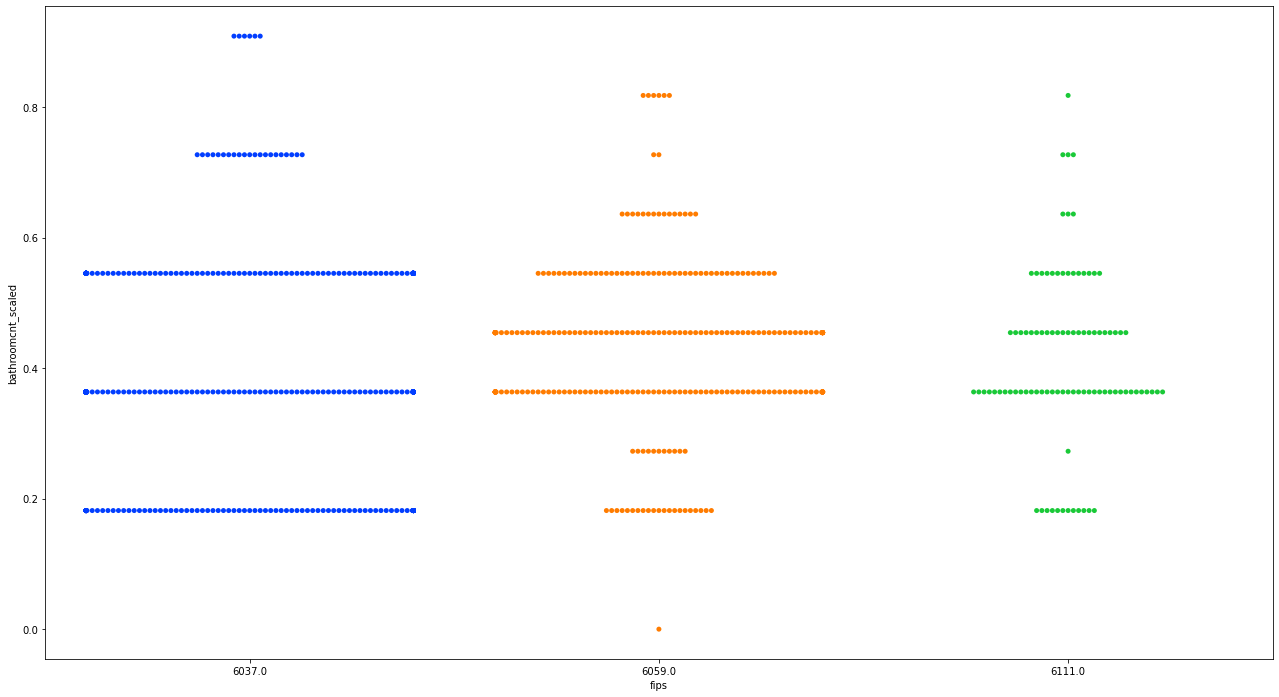

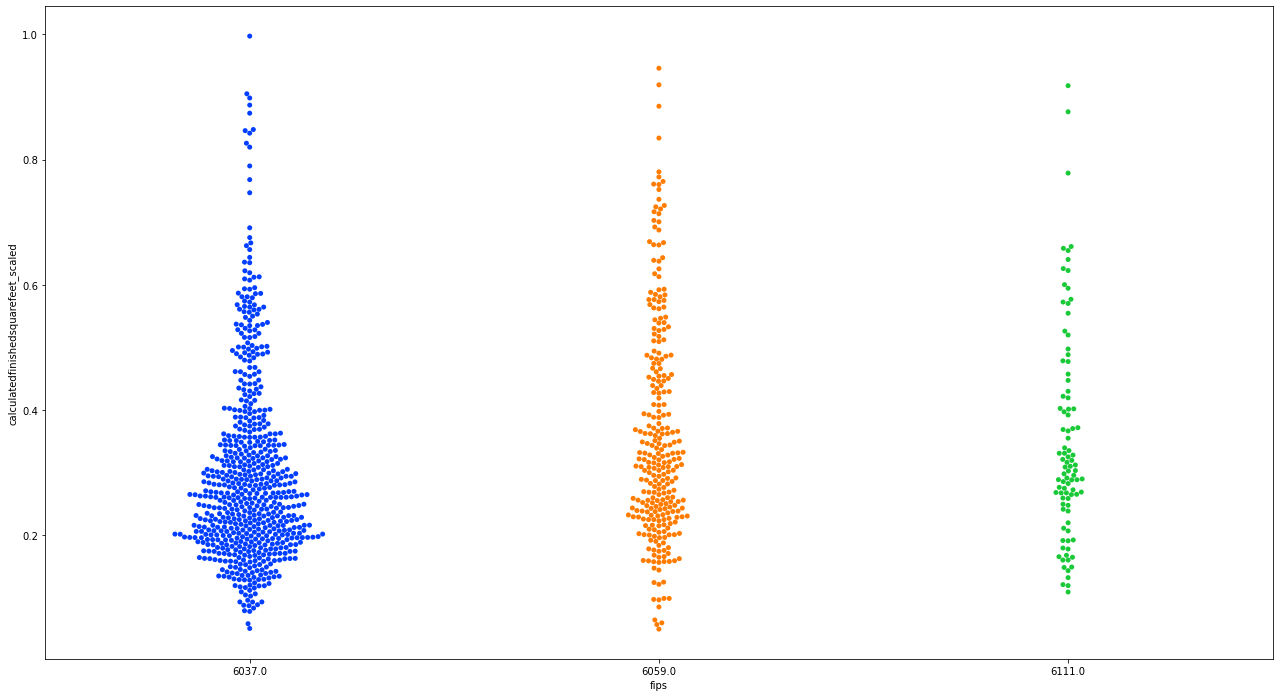

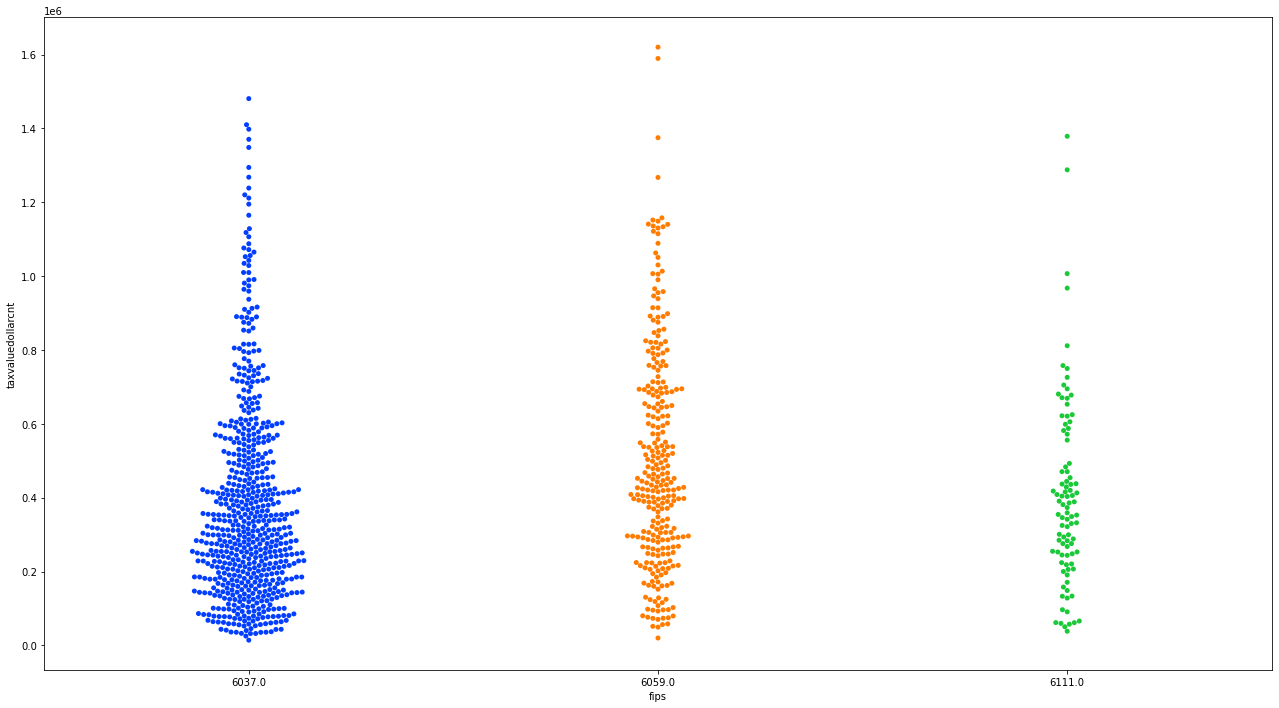

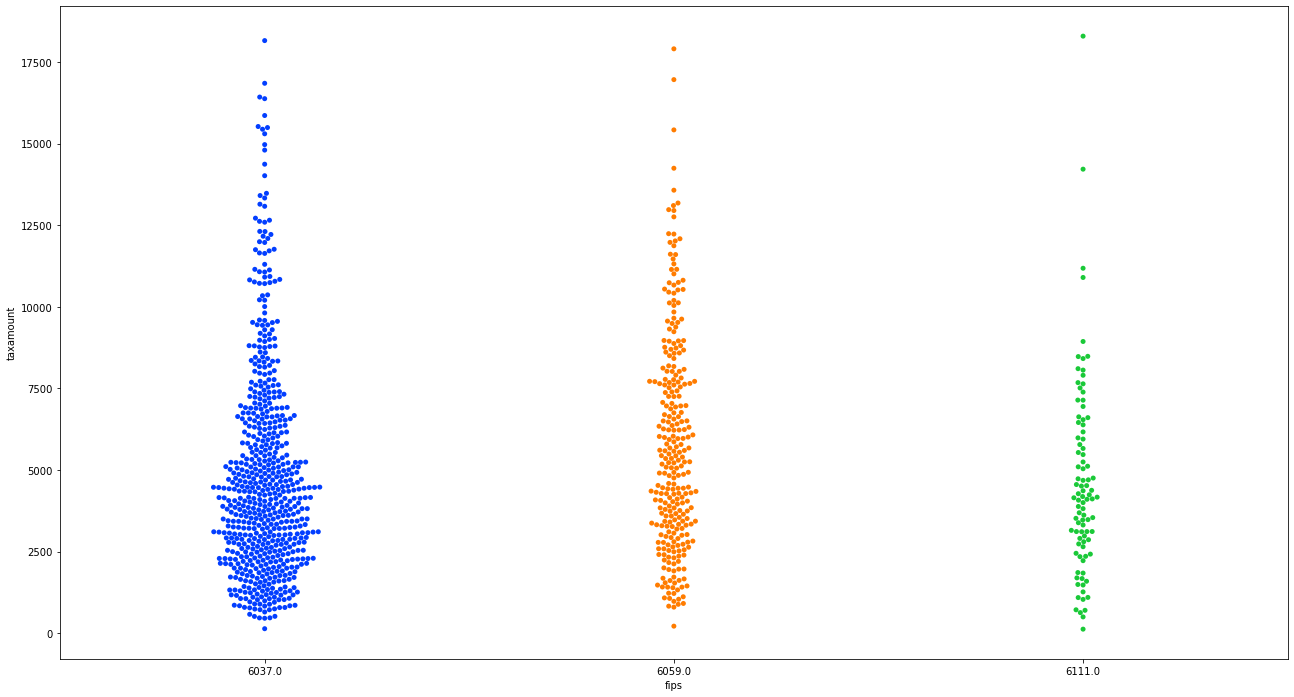

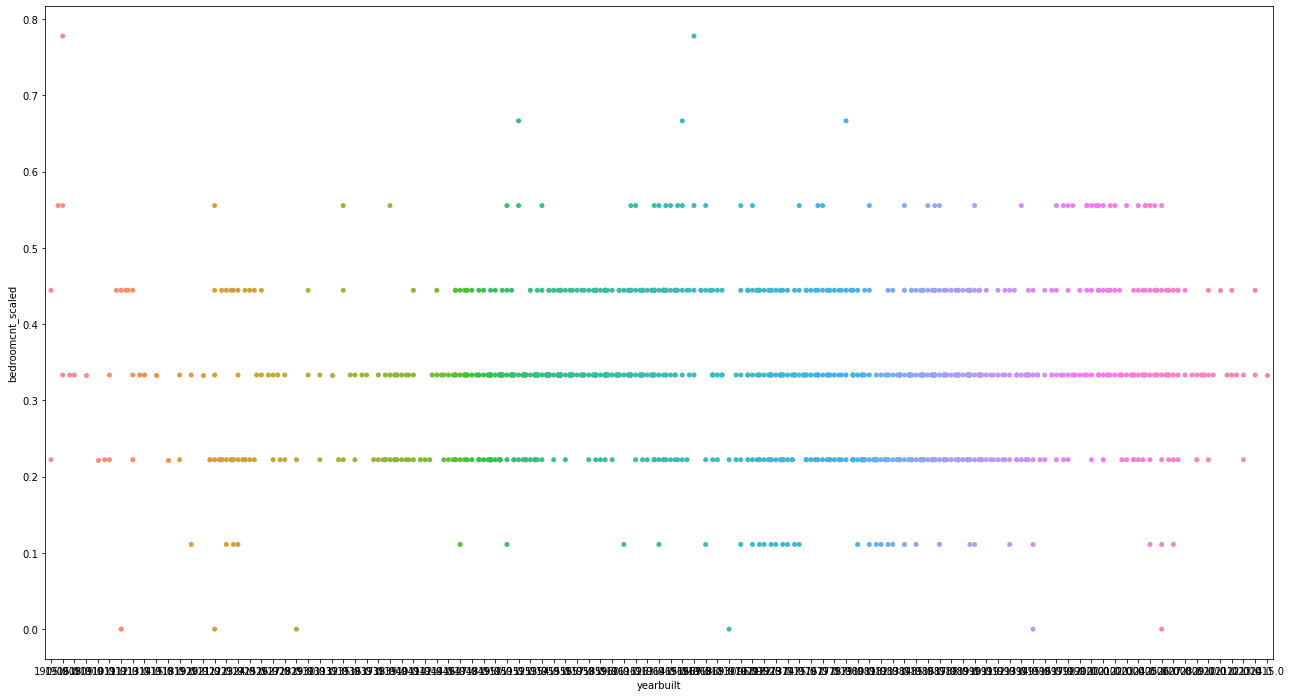

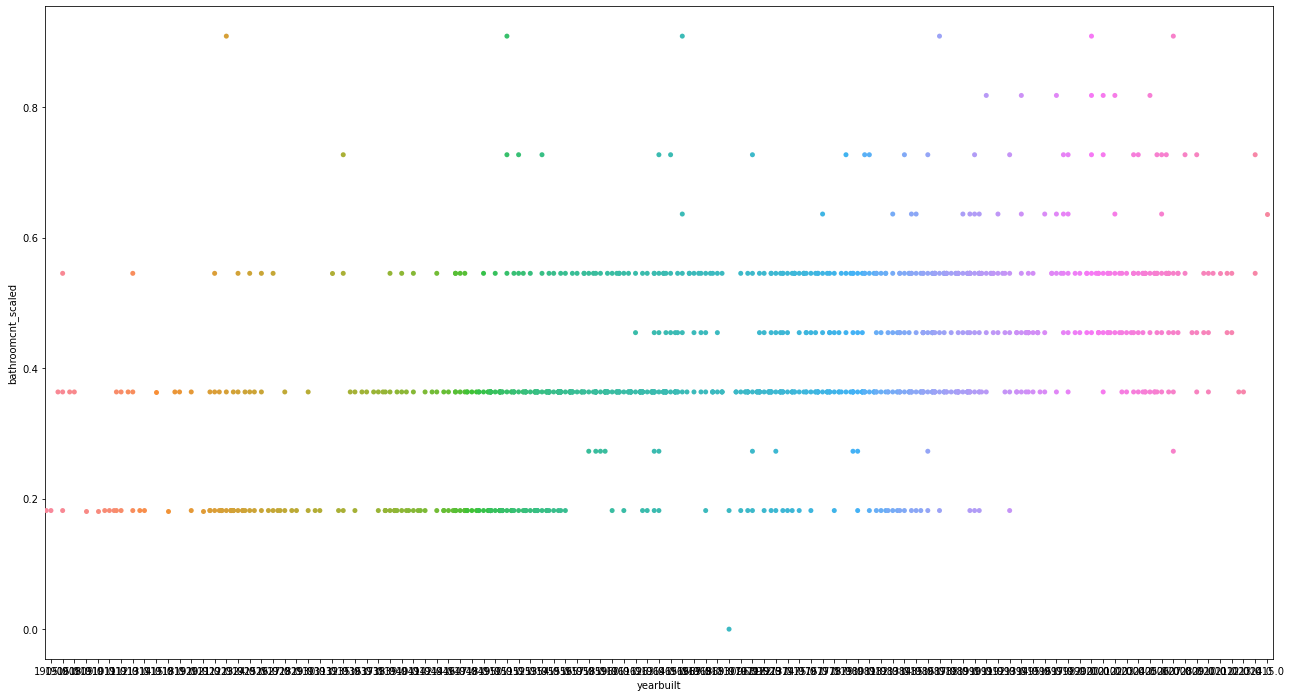

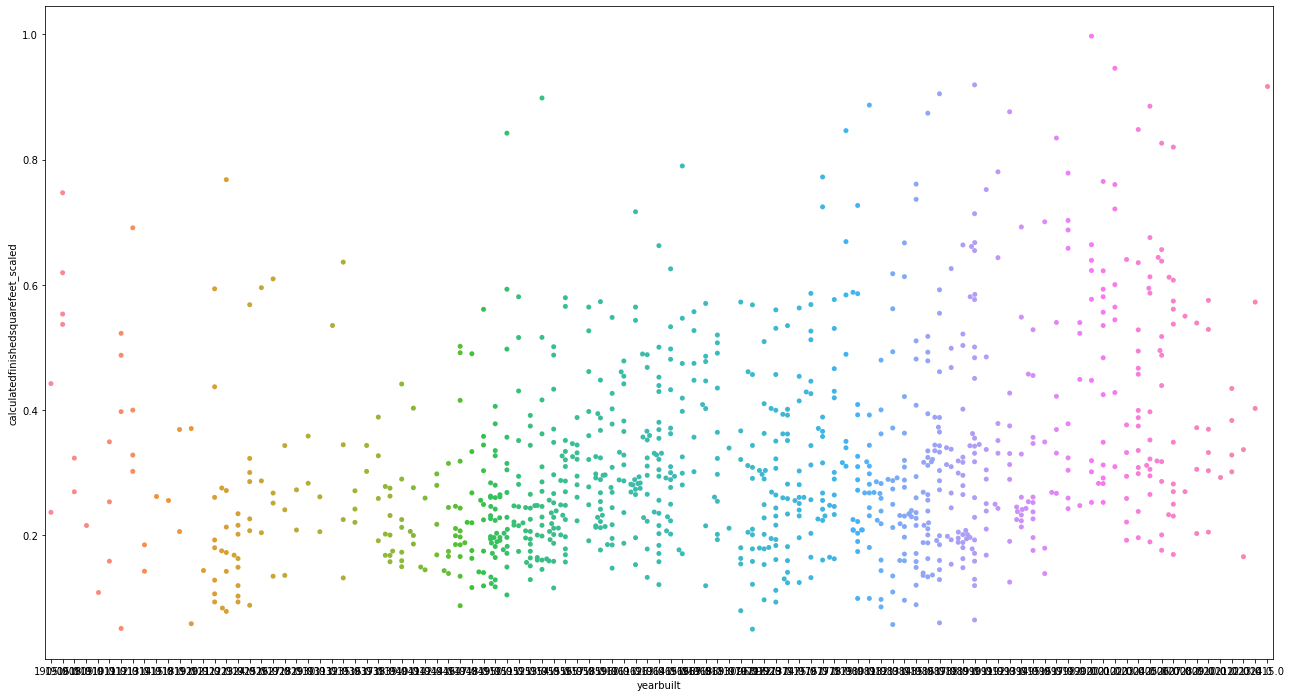

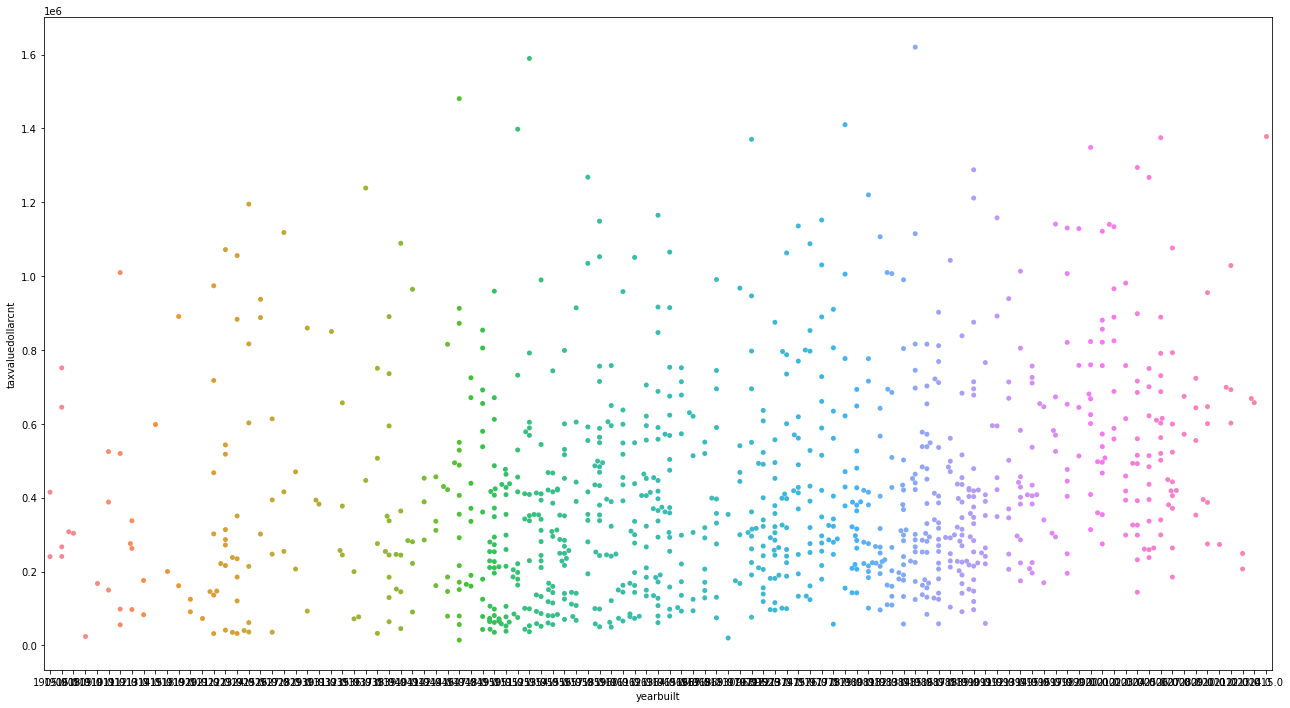

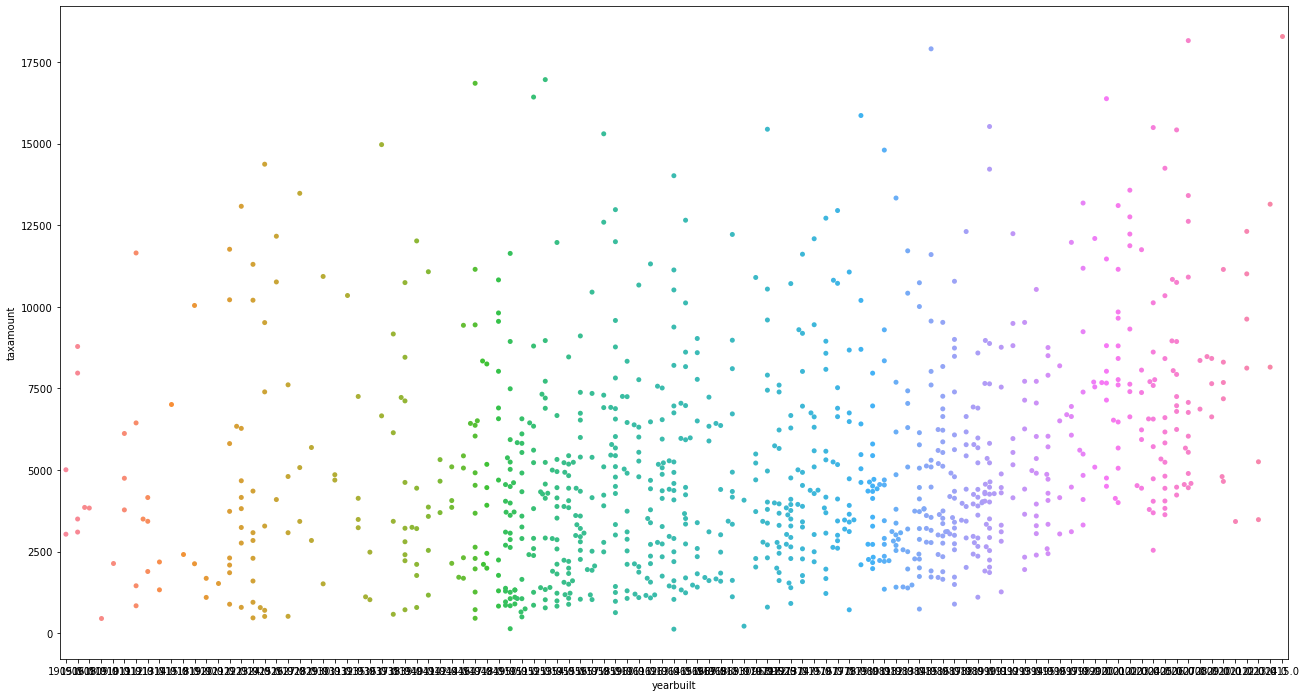

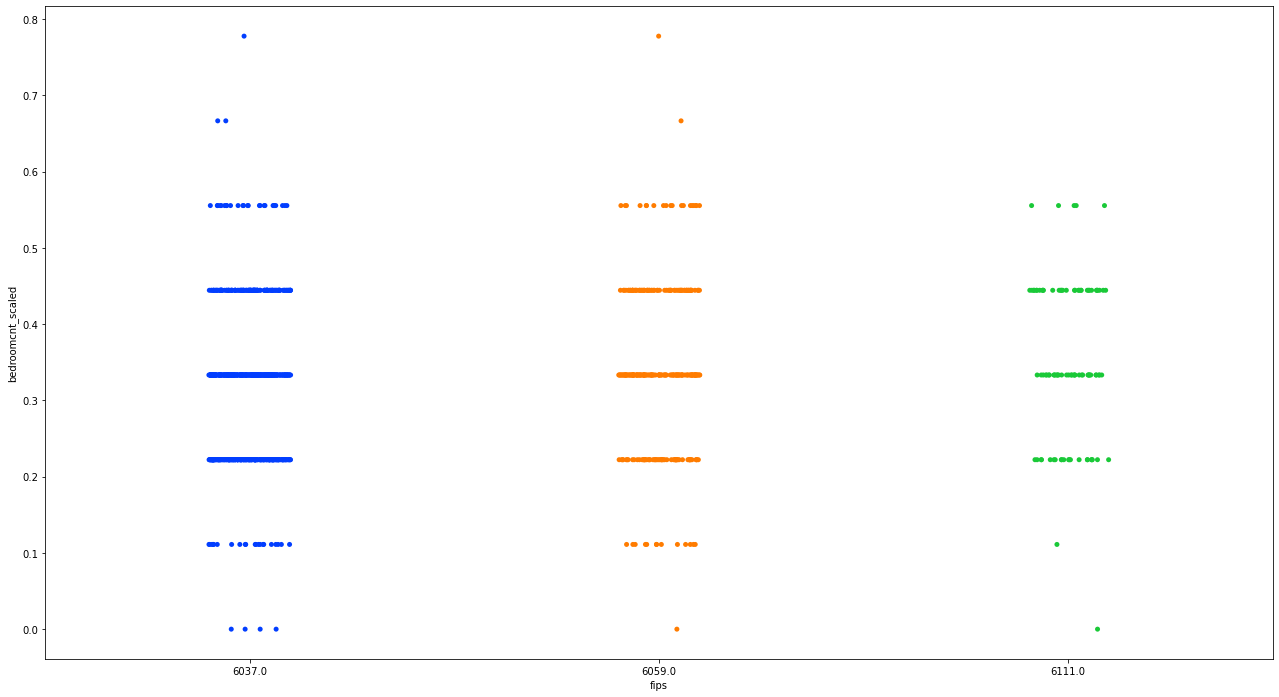

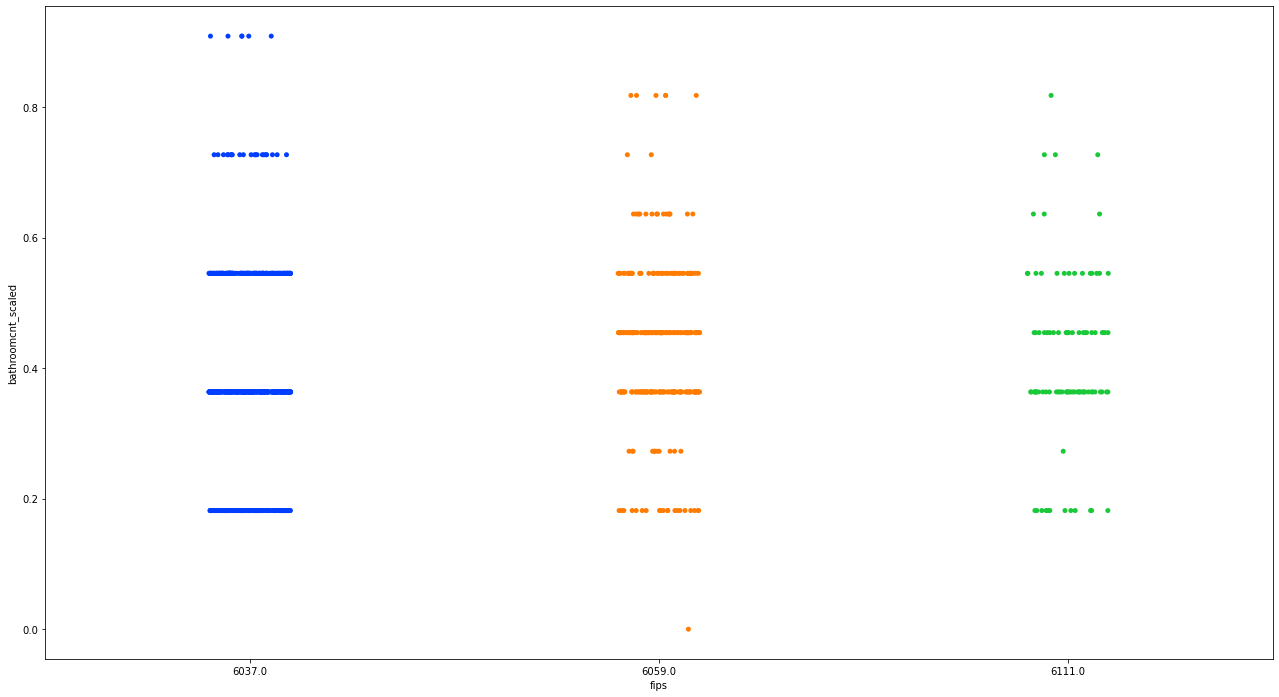

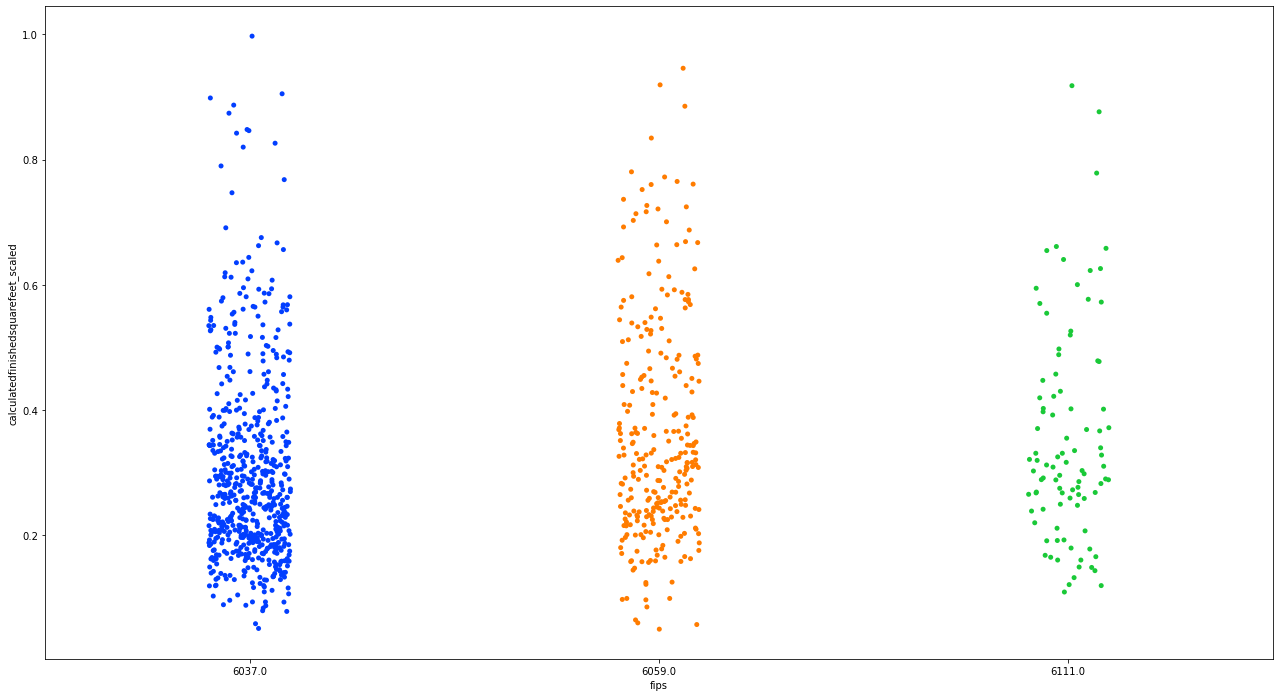

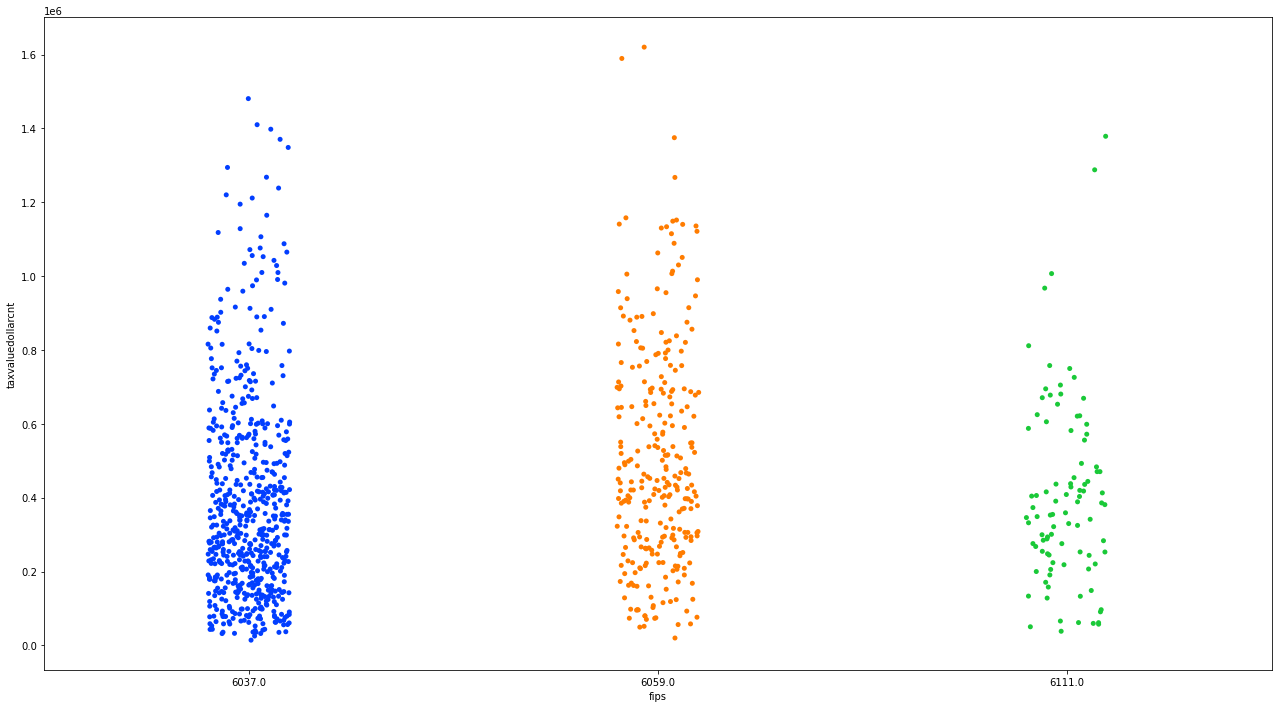

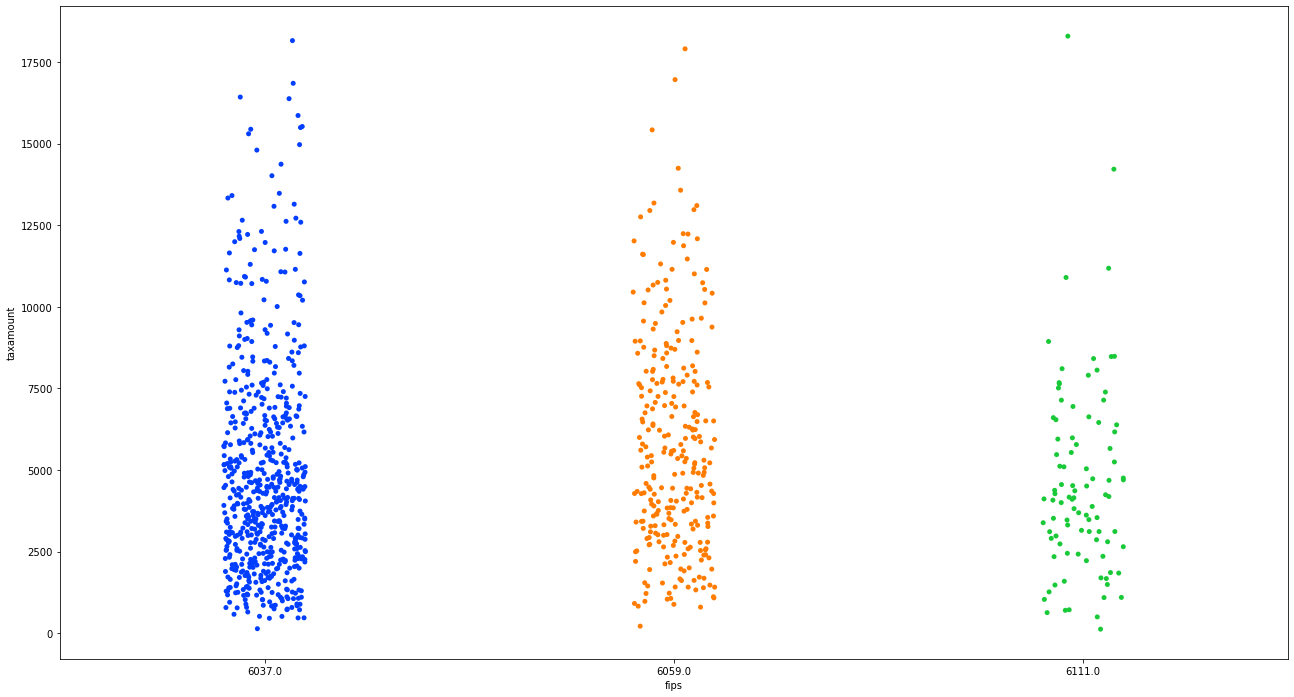

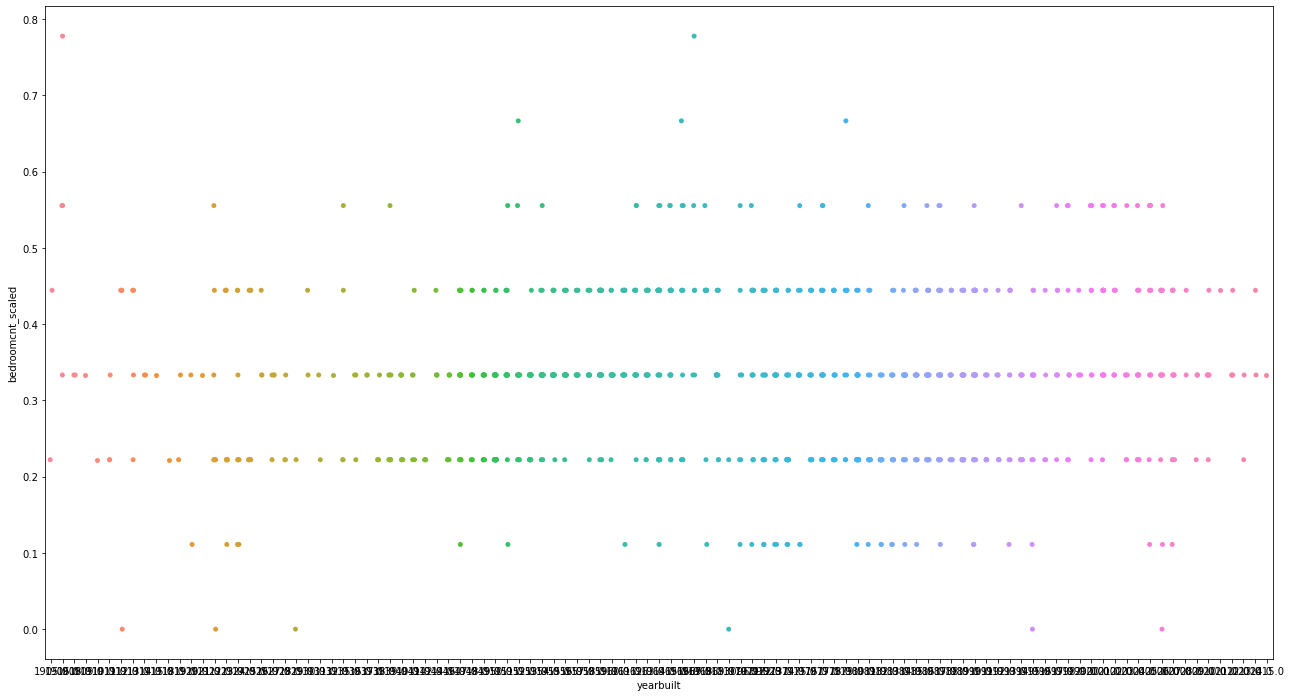

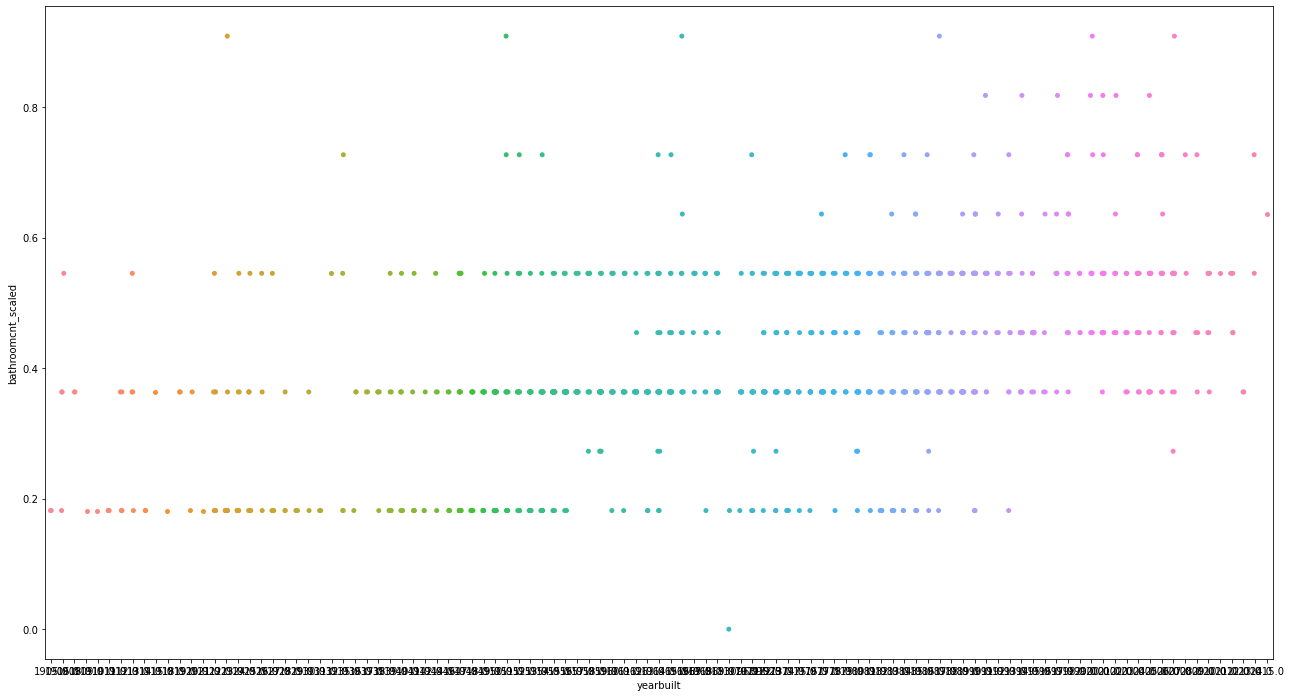

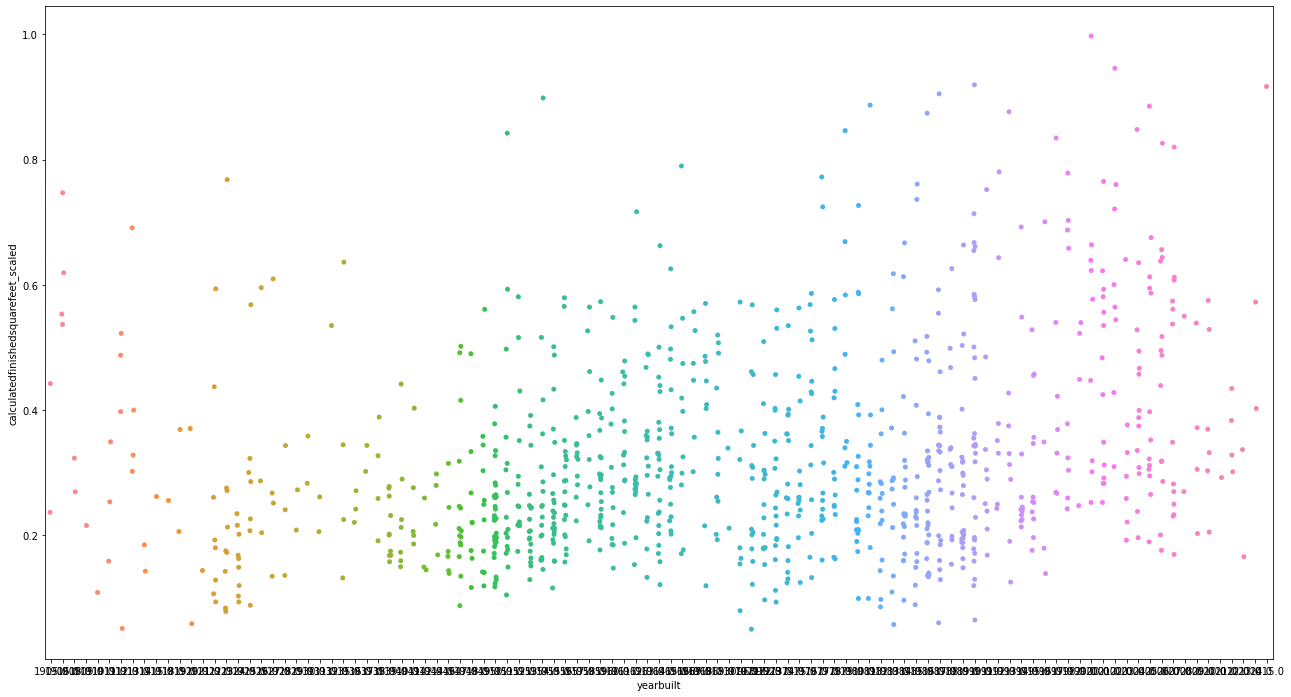

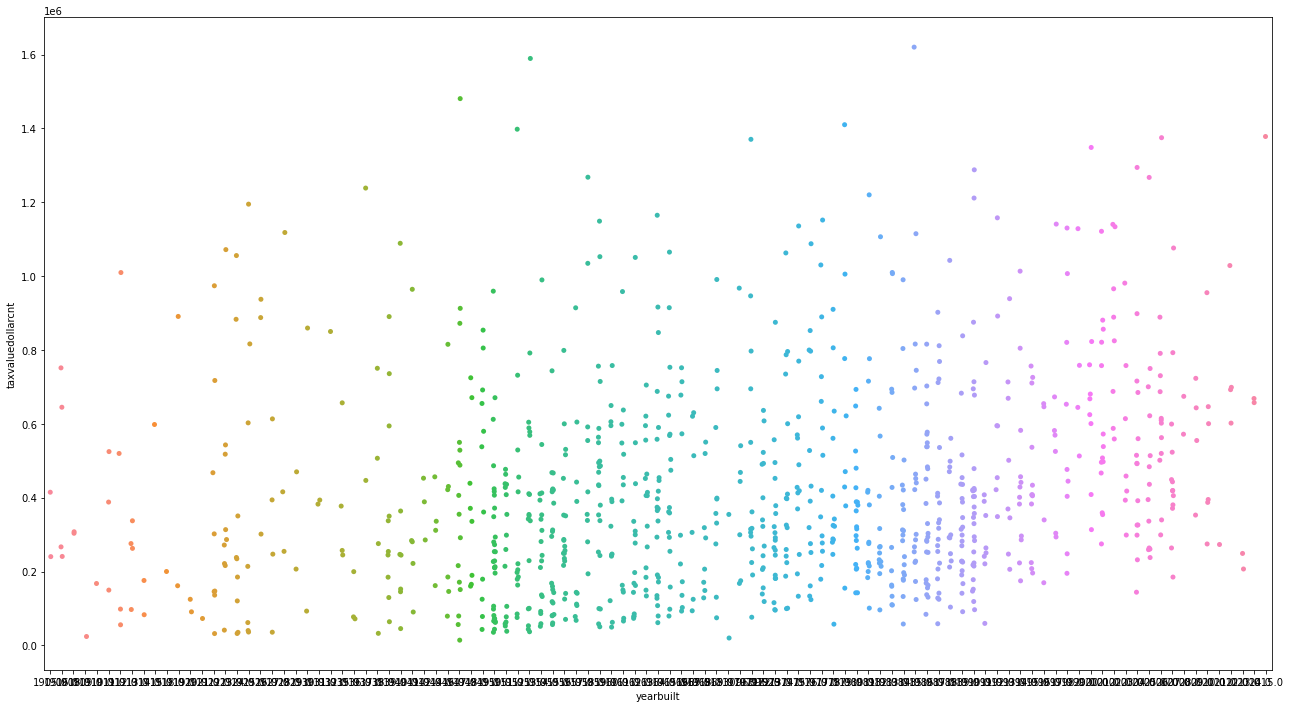

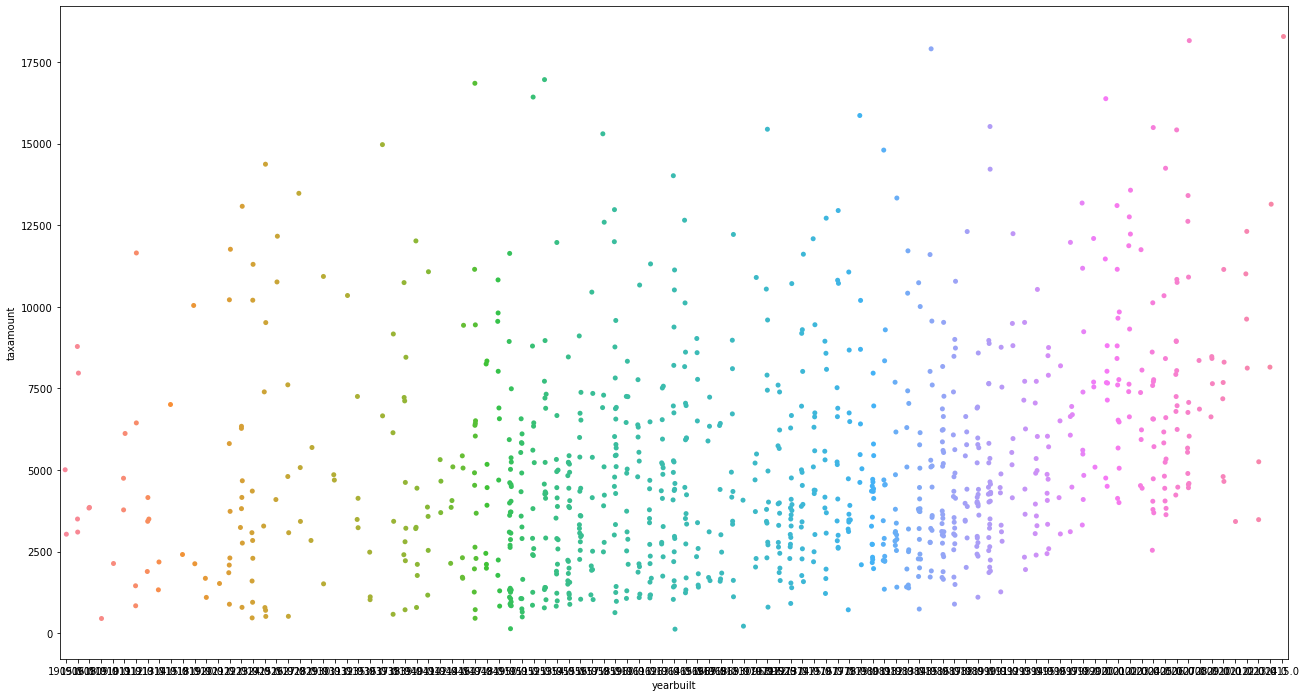

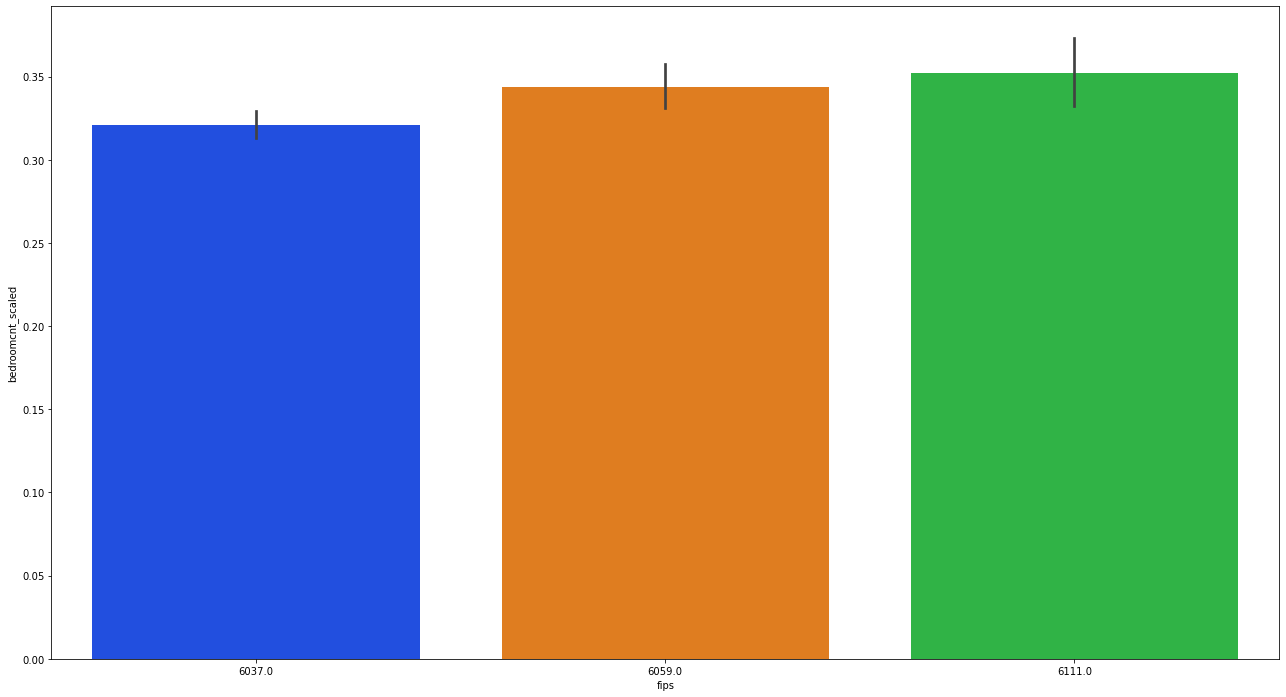

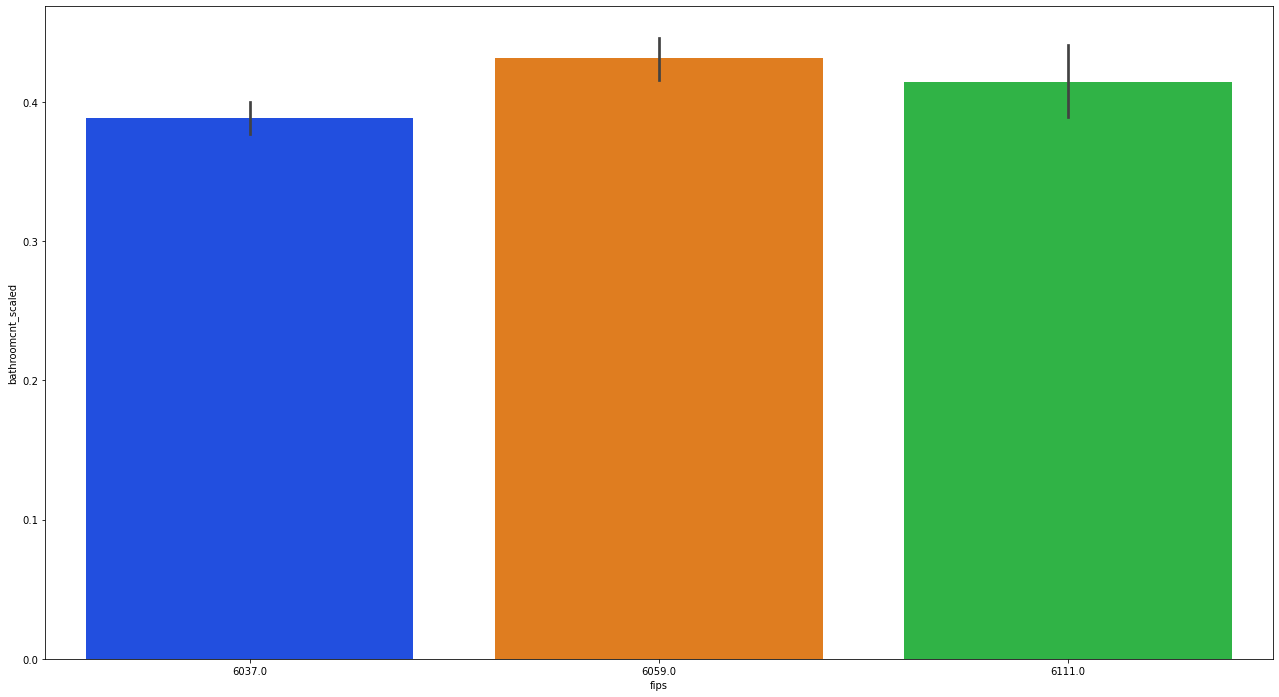

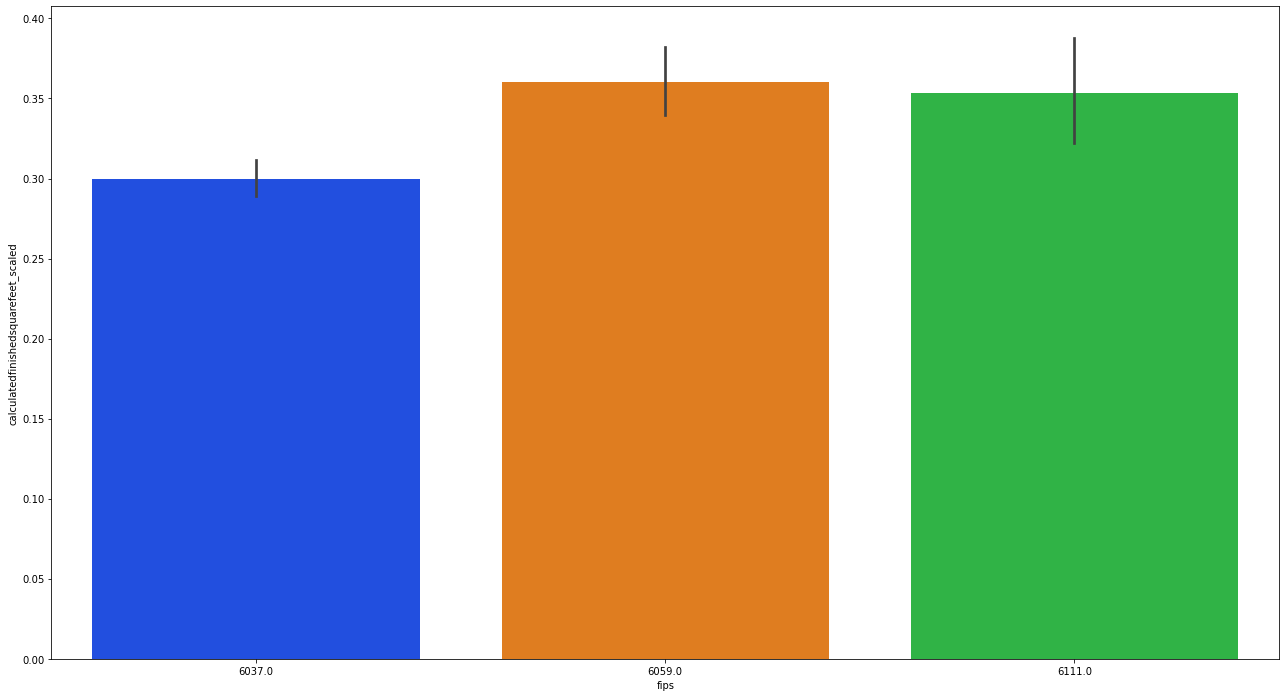

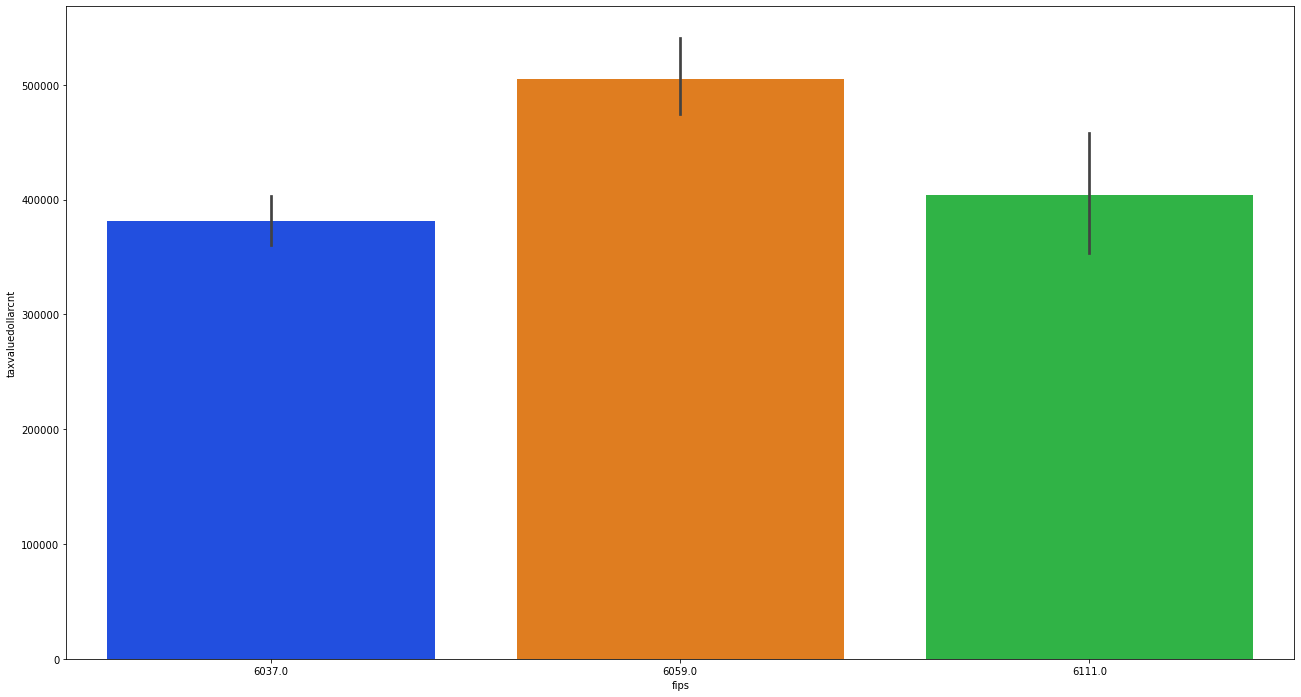

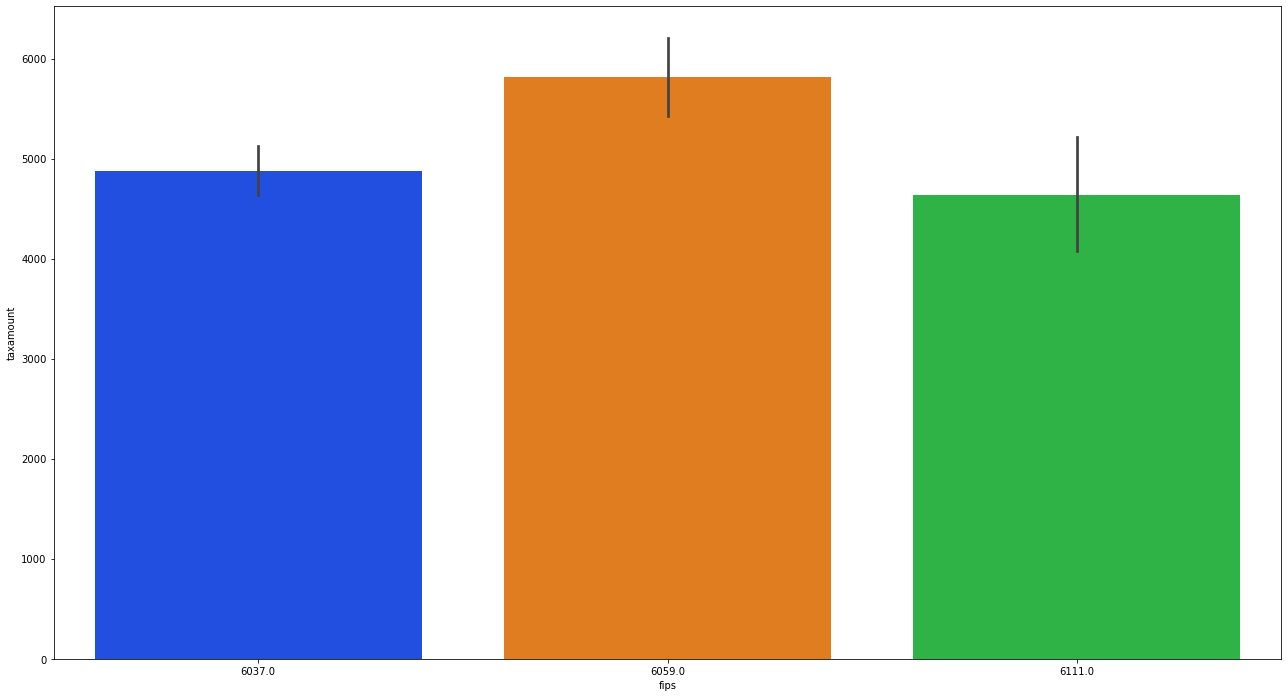

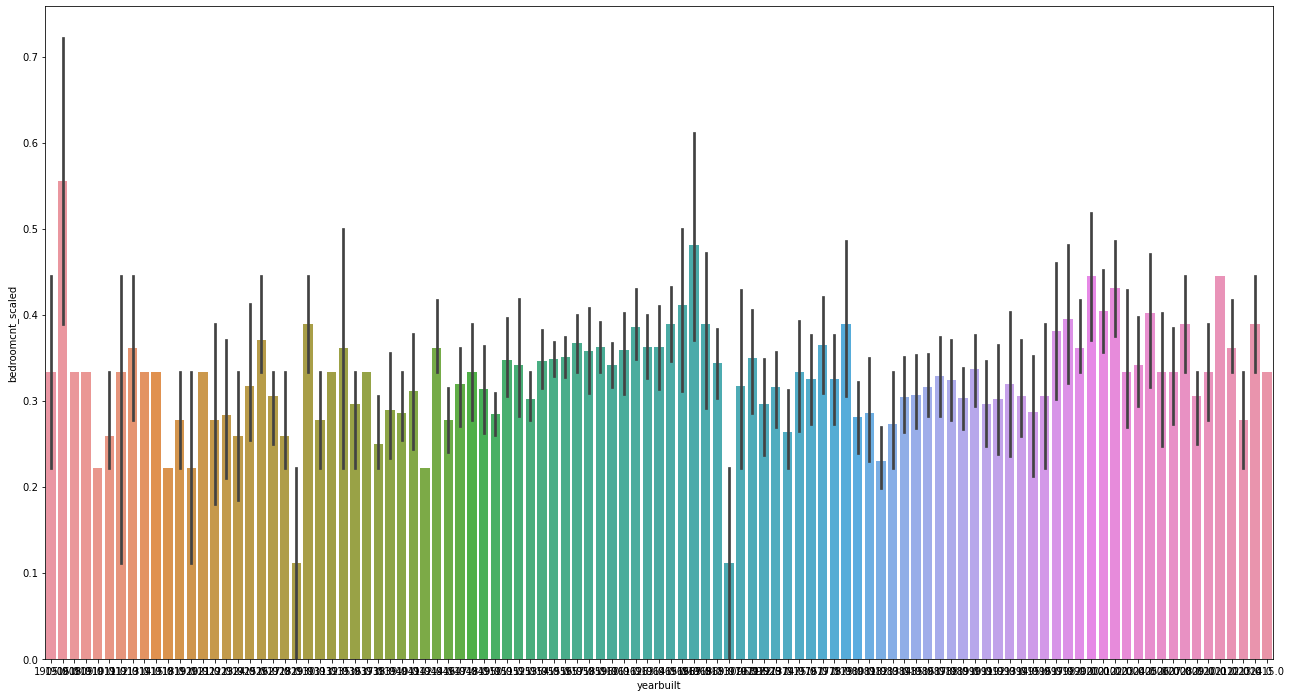

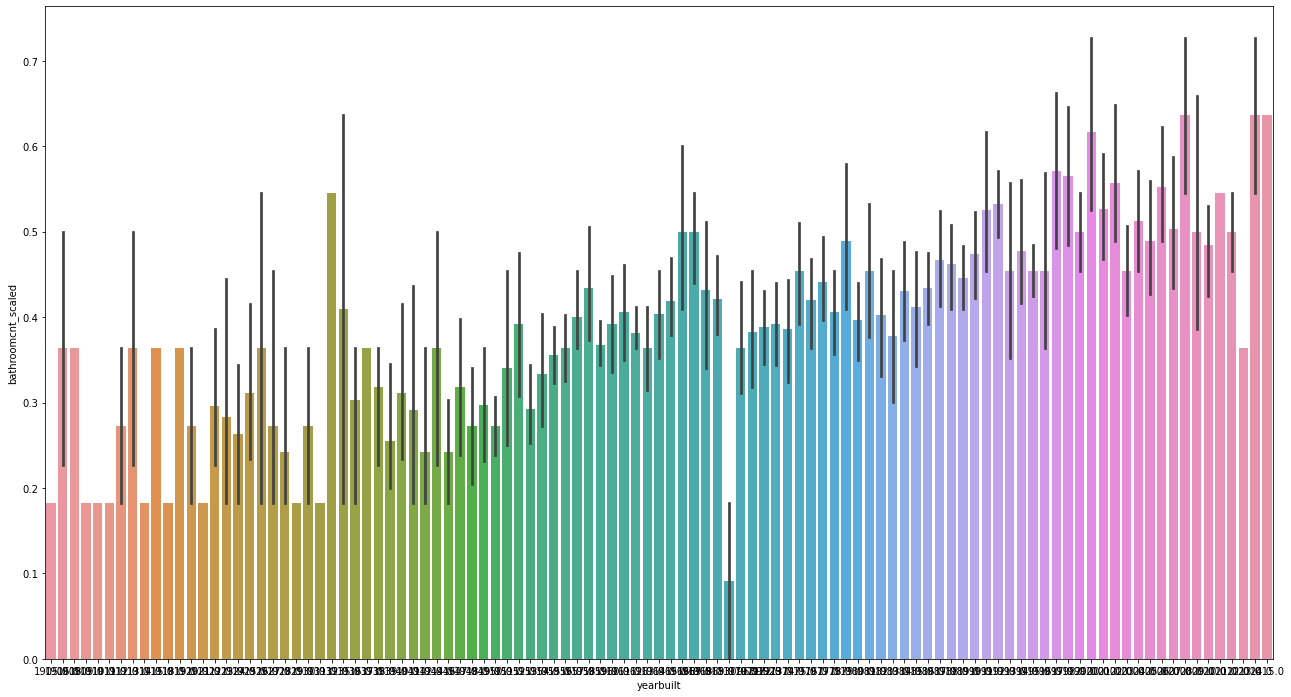

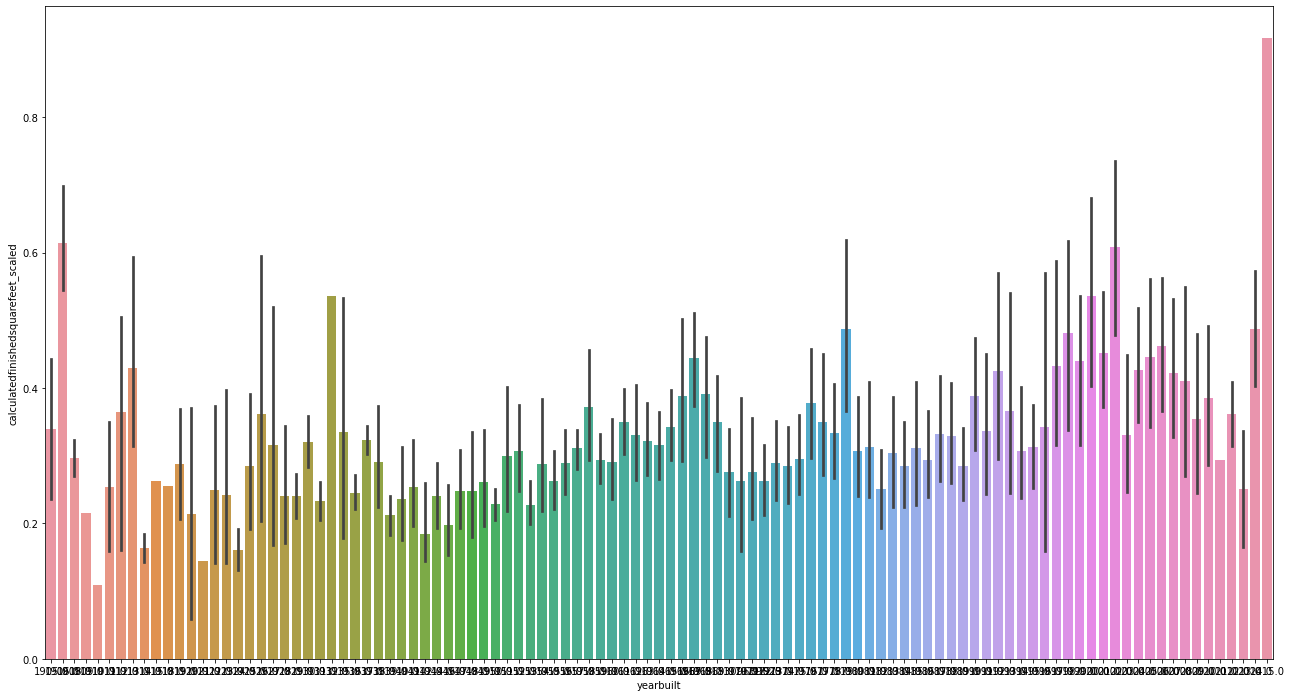

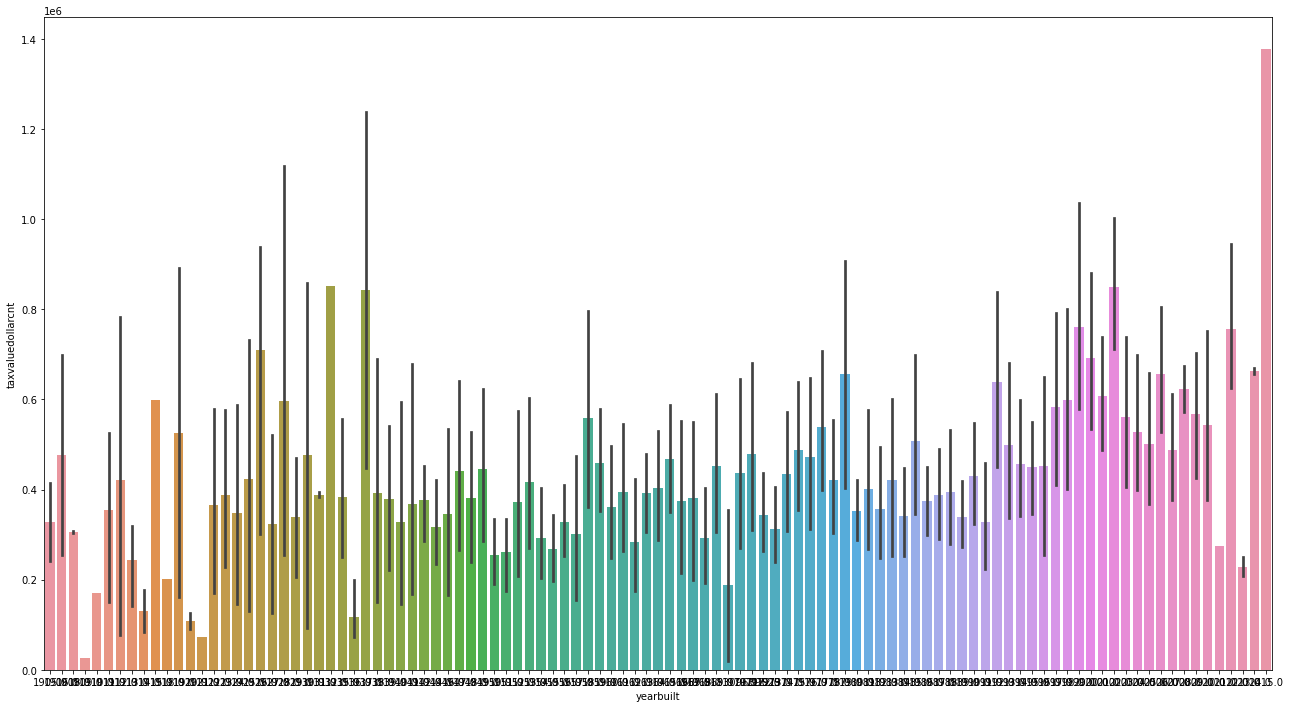

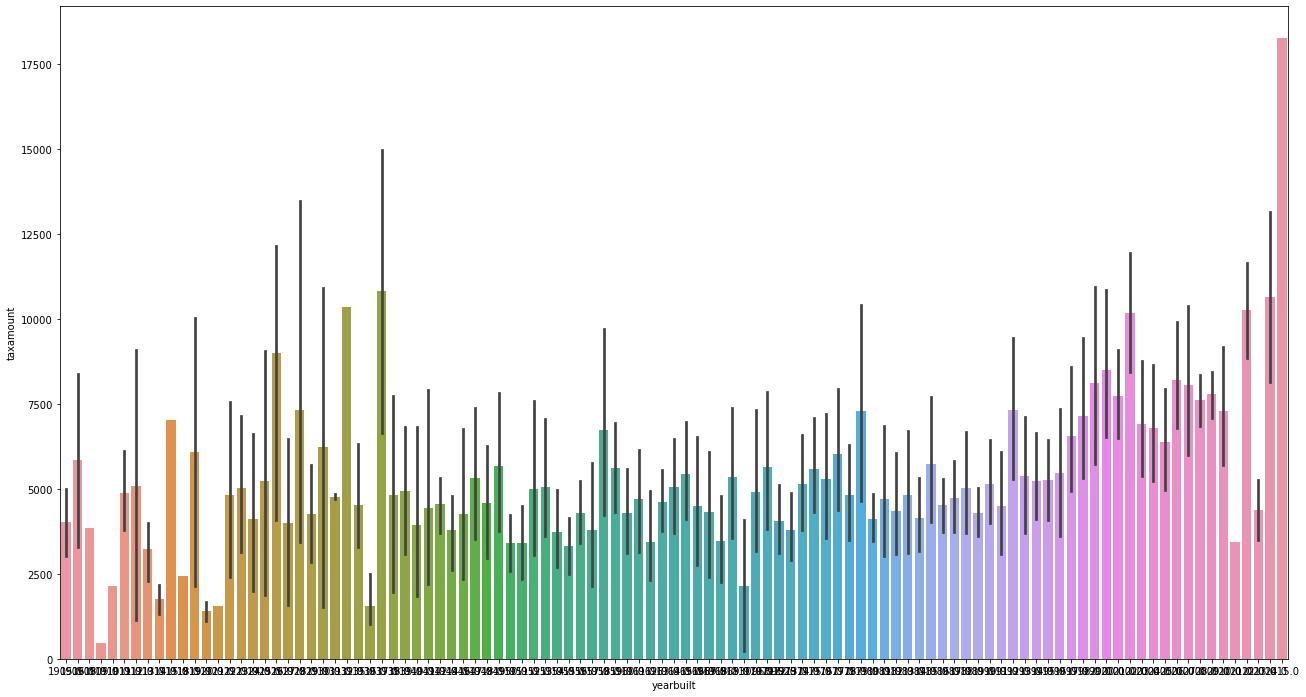

In [27]:
plot_categorical_and_continuous_vars(train_scaled.sample(1000), categorical, continuous)

### Hypotheses

To further explore the data, we will use hypothesis testing to discover relationships between features in the data.

For the following hypotheses, we will set our alpha value, $\alpha$, equal to $0.05$.

First we will find out if there is a correlation between the features `calculatedfinishedsquarefeet`, `bedroomcnt`, and `bathroomcnt` with `taxvaluedollarcnt`. We use `pearsonr` to test for correlation.

#### Correlation between square feet and home value

$H_0$: There is no significant correlation between calculated finished square feet and tax value. 

$H_a$: There is a significant correlation between calculated finished square feet and tax value. 

In [28]:
test_results = stats.pearsonr(train.taxvaluedollarcnt, train.calculatedfinishedsquarefeet)
test_results

(0.5376187668263325, 0.0)

Because our p is less than 0.05, we reject our null hypothesis, and we conclude that there is a significant correlation between square feet and the value of the home.

#### Correlation between bedroom count and home value

$H_0$: There is no significant correlation between bedroom count and tax value. 

$H_a$: There is a significant correlation between bedroom count and tax value. 

In [29]:
test_results = stats.pearsonr(train.taxvaluedollarcnt, train.bedroomcnt)
test_results

(0.2636049284635911, 0.0)

Because our p is less than 0.05, we reject our null hypothesis, and we conclude that there is a significant correlation between bedroom count and the value of the home.

#### Correlation between bathroom count and home value

$H_0$: There is no significant correlation between bathroom count and tax value. 

$H_a$: There is a significant correlation between bathroom count and tax value. 

In [30]:
test_results = stats.pearsonr(train.taxvaluedollarcnt, train.bathroomcnt)
test_results

(0.44574308444092825, 0.0)

Because our p is less than 0.05, we reject our null hypothesis, and we conclude that there is a significant correlation between bathroom count and the value of the home.

The variables `calculatedfinishedsquarefeet`, `bedroomcnt`, and `bathroomcnt` are all highly correlated with the tax value of a home. 

Now we explore the relationship between county and tax value. We create new DataFrames for each county below.

In [31]:
los_angeles = train[train.fips == 6037.0]
orange = train[train.fips == 6059.0]
ventura = train[train.fips == 6111.0]

We cant use the independent t-test to test for difference between property values in these counties.

#### Los Angeles County vs. Orange County

$H_0$: There is no significant difference in `taxvaluedollarcnt` for homes in Los Angeles County (FIPS code $6037$) and homes Ventura County (FIPS code $6111$). 

$H_a$: There is a significant difference in `taxvaluedollarcnt` for homes in Los Angeles County (FIPS code $6037$) and homes in either Ventura County (FIPS code $6111$).

In [32]:
test_results = stats.ttest_ind(los_angeles.taxvaluedollarcnt, ventura.taxvaluedollarcnt)
test_results

Ttest_indResult(statistic=-9.544208120078348, pvalue=1.5215905269899356e-21)

Because our pvalue is less than our alpha of 0.05, we reject the null hypothesis and conclude there is a significant difference in home value for houses in Los Angeles vs. Orange County.

#### Los Angeles County vs. Ventura County

$H_0$: There is no significant difference in `taxvaluedollarcnt` for homes in Los Angeles County (FIPS code $6037$) and homes Ventura County (FIPS code $6111$). 

$H_a$: There is a significant difference in `taxvaluedollarcnt` for homes in Los Angeles County (FIPS code $6037$) and homes in either Ventura County (FIPS code $6111$).

In [33]:
test_results = stats.ttest_ind(los_angeles.taxvaluedollarcnt, ventura.taxvaluedollarcnt)
test_results

Ttest_indResult(statistic=-9.544208120078348, pvalue=1.5215905269899356e-21)

Because our pvalue is less than our alpha of 0.05, we reject the null hypothesis and conclude there is a significant difference in home value for houses in Los Angeles vs. Ventura County.

#### Orange County vs. Ventura County

$H_0$: There is no significant difference in `taxvaluedollarcnt` for homes in Orange County (FIPS code $6059$) and homes Ventura County (FIPS code $6111$). 

$H_a$: There is a significant difference in `taxvaluedollarcnt` for homes in Orange County (FIPS code $6059$) and homes in either Ventura County (FIPS code $6111$).

In [34]:
test_results = stats.ttest_ind(orange.taxvaluedollarcnt, ventura.taxvaluedollarcnt)
test_results

Ttest_indResult(statistic=4.760407183189226, pvalue=1.9568642508081846e-06)

Because our pvalue is less than our alpha of 0.05, we reject the null hypothesis and conclude there is a significant difference in home value for houses in Orange vs. Ventura County.

### Key Takeaways

 - The features `calculatedfinishedsquarefeet`, `bedroomcnt`, `bathroomcnt` are highly correlated with churn. 
 - There is significant difference between the property values in Los Angeles, Orange, and Ventura County.

## Feature Engineering

We will now use feature engineering to determine what the most imporatant features in the data are. We will use these most important features to construct our models. 

To use feature engineering, we will need to split our data into X and y. The X datasets will contain all features except the target variable, `taxvaluedollarcnt`. The y dataset will contain only the variable `taxvaluedollarcnt`. We will also eliminate the feature `taxamount` because this feature is a derivative of `taxdollarvaluecnt`.

In [28]:
#Divide between X and y
X_train = train_scaled[['yearbuilt', 'fips', 'calculatedfinishedsquarefeet_scaled', 'bedroomcnt_scaled', 'bathroomcnt_scaled']]
y_train = train_scaled.taxvaluedollarcnt
X_validate = validate[['yearbuilt', 'fips', 'calculatedfinishedsquarefeet_scaled', 'bedroomcnt_scaled', 'bathroomcnt_scaled']]
y_validate = validate.taxvaluedollarcnt
X_test = test[['yearbuilt', 'fips', 'calculatedfinishedsquarefeet_scaled', 'bedroomcnt_scaled', 'bathroomcnt_scaled']]
y_test = test.taxvaluedollarcnt

In [36]:
X_train

,yearbuilt,fips,calculatedfinishedsquarefeet_scaled,bedroomcnt_scaled,bathroomcnt_scaled
8266,2009.0,6037.0,0.374276,0.444444,0.363636
18949,1978.0,6111.0,0.226928,0.222222,0.454545
22247,1987.0,6037.0,0.315872,0.444444,0.545455
7526,1992.0,6037.0,0.321890,0.222222,0.545455
17592,2000.0,6111.0,0.823005,0.444444,0.818182
...,...,...,...,...,...
33798,1948.0,6037.0,0.064200,0.111111,0.181818
19651,1990.0,6037.0,0.221578,0.333333,0.363636
9171,1975.0,6037.0,0.229380,0.333333,0.363636
350,2006.0,6059.0,0.352876,0.333333,0.454545


### Select K Best

The first feature engineering method we will use is Select K Best. First, we will use this method to find the most important features in the dataset for predicting the target variable `taxvaluedollarcnt`.

In [37]:
# Create model
kbest_1 = SelectKBest(f_regression, k=1)
#Fit the model
kbest_1.fit(X_train, y_train)
X_train.columns[kbest_1.get_support()]

Index(['calculatedfinishedsquarefeet_scaled'], dtype='object')

The Select K Best method with `k=1` indicates that `calculatedfinishedsquarefeet` is the most important features for predicting `taxvaluedollarcnt`. Now we will use Select K Best to find the top two most important features.

In [38]:
# Create model
kbest_2 = SelectKBest(f_regression, k=2)
#Fit the model
kbest_2.fit(X_train, y_train)
X_train.columns[kbest_2.get_support()]

Index(['calculatedfinishedsquarefeet_scaled', 'bathroomcnt_scaled'], dtype='object')

The Select K Best method with `k=2` indiciates that `calculatedfinishedsquarefeet` and `bathroomcnt` are the top two most important features for predicting `taxvaluedollarcnt`. Now we will use Select K Best to find the top three most important features. 

In [39]:
# Create model
kbest_3 = SelectKBest(f_regression, k=3)
#Fit the model
kbest_3.fit(X_train, y_train)
X_train.columns[kbest_3.get_support()]

Index(['calculatedfinishedsquarefeet_scaled', 'bedroomcnt_scaled',
       'bathroomcnt_scaled'],
      dtype='object')

The Select K Best method with `k=3` indicates to us that `calculatedfinishedsquarefeet`, `bedroomcnt`, and `bathroomcnt` are the top three most important for predicting `taxvaluedollarcnt`.

### Recursive Feature Elimination


We will now utilize Recursive Feature elimination to find the most important features in the dataset to predict the target feature `taxvaluedollarcnt`. First, we use this method to find the most important feature in the data.

In [40]:
rfe_1 = RFE(estimator=LinearRegression(), n_features_to_select=1)
rfe_1.fit(X_train, y_train)
X_train.columns[rfe_1.get_support()]

Index(['calculatedfinishedsquarefeet_scaled'], dtype='object')

Similar to Select K Best, the Recursive Feature Elimination tells us that `calculatedfinishedsquarefeet` is the most predictive variable of `taxvaluedollarcnt`. Now we will use the Recursive Feature Elimination to find the top two most important features.

In [41]:
rfe_2 = RFE(estimator=LinearRegression(), n_features_to_select=2)
rfe_2.fit(X_train, y_train)
X_train.columns[rfe_2.get_support()]

Index(['calculatedfinishedsquarefeet_scaled', 'bedroomcnt_scaled'], dtype='object')

There is a discrepancy with the Select K Best features method, which told us that square feet and bathroom count were the top two most important feature. Here the Recursive Feature Elimination Method tells us that square feet and bedroom count are the most important features for predicting tax value of a home. We will see if these methods converge when we include three features. 

In [42]:
rfe_3 = RFE(estimator=LinearRegression(), n_features_to_select=3)
rfe_3.fit(X_train, y_train)
X_train.columns[rfe_3.get_support()]

Index(['calculatedfinishedsquarefeet_scaled', 'bedroomcnt_scaled',
       'bathroomcnt_scaled'],
      dtype='object')

The result of Recursive Feature Elimination with three features is the same as the result for Select K Best method with three features. Thus, we can conclude that square feet, bedroom count, and bathroom count are likely the most important features for predicting the property value. We will use these three features when we begin modeling. 

### Key Takeaways

 - Although there was a discrepancy when selecting for two features, the Select K Best method and Recursive Feature Elimination yielded the same result when selecting for the top three most important features. 
 - The most important features in our DataFrame for predicting the value of a property are square feet, bedroom count, and bathroom count. 

## Modeling

Our `y_train`, `y_validate`, and `y_test` are currently series, so we will need to convert these elements to DataFrames to use them in modeling.

In [29]:
#Convert to DataFrame
y_train = pd.DataFrame(y_train)
y_validate = pd.DataFrame(y_validate)
y_test = pd.DataFrame(y_test)

Based on our feature engineering above, we concluded that `calculatedfinishedsquarefeet_scaled`, `bedroomcnt_scaled`, and `bathroomcnt_scaled` are the features most predictive of `taxvaluedollarcnt`. 

Therefore, we create a DataFrame with these three features, which we will later use in our models to predict `taxvaluedollarcnt`.

**Note:** We use the scaled version of these features because the scaled version is easier to processs in our models.

In [30]:
#Create DataFrames for modeling
X_train_model = X_train[['calculatedfinishedsquarefeet_scaled', 'bedroomcnt_scaled', 'bathroomcnt_scaled']]
X_validate_model = X_validate[['calculatedfinishedsquarefeet_scaled', 'bedroomcnt_scaled', 'bathroomcnt_scaled']]
X_test_model = X_test[['calculatedfinishedsquarefeet_scaled', 'bedroomcnt_scaled', 'bathroomcnt_scaled']]

### Evaluate imports

We will utilize the following imports to evaluate our models in this section. 

In [38]:
from evaluate import plot_residuals
from evaluate import regression_errors
from evaluate import baseline_mean_errors
from evaluate import better_than_baseline

### Baseline

The first step of modeling is to establish a baseline that we can compare our model to. First, we will establish the baseline using the mean.

In [31]:
# Predict taxvaluedollarcnt_pred_mean
taxvaluedollarcnt_pred_mean = y_train.taxvaluedollarcnt.mean()
y_train['taxvaluedollarcnt_pred_mean'] = taxvaluedollarcnt_pred_mean
y_validate['taxvaluedollarcnt_pred_mean'] = taxvaluedollarcnt_pred_mean

Now we will calculate the baseline using the median. 

In [32]:
# compute taxvaluedollarcnt_pred_median
taxvaluedollarcnt_pred_median = y_train.taxvaluedollarcnt.median()
y_train['taxvaluedollarcnt_pred_median'] = taxvaluedollarcnt_pred_median
y_validate['taxvaluedollarcnt_pred_median'] = taxvaluedollarcnt_pred_median

In [33]:
y_train.head()

,taxvaluedollarcnt,taxvaluedollarcnt_pred_mean,taxvaluedollarcnt_pred_median
8266,286663.0,408516.372149,350000.0
18949,64609.0,408516.372149,350000.0
22247,210212.0,408516.372149,350000.0
7526,237037.0,408516.372149,350000.0
17592,1094525.0,408516.372149,350000.0


In [34]:
y_validate.head()

,taxvaluedollarcnt,taxvaluedollarcnt_pred_mean,taxvaluedollarcnt_pred_median
10929,803062.0,408516.372149,350000.0
19794,507410.0,408516.372149,350000.0
6592,1149000.0,408516.372149,350000.0
30617,390000.0,408516.372149,350000.0
22213,439000.0,408516.372149,350000.0


We will use the root mean squared error to evaluate our baseline calculations.

In [35]:
# RMSE of taxvaluedollarcnt_pred_mean
rmse_train = mean_squared_error(y_train.taxvaluedollarcnt, y_train.taxvaluedollarcnt_pred_mean) ** .5
rmse_validate = mean_squared_error(y_validate.taxvaluedollarcnt, y_validate.taxvaluedollarcnt_pred_mean) ** (1/2)
print("RMSE using Mean\nTrain/In-Sample: ", round(rmse_train, 2), 
      "\nValidate/Out-of-Sample: ", round(rmse_validate, 2))

# RMSE of taxvaluedollarcnt_pred_median
rmse_train = mean_squared_error(y_train.taxvaluedollarcnt, y_train.taxvaluedollarcnt_pred_median) ** .5
rmse_validate = mean_squared_error(y_validate.taxvaluedollarcnt, y_validate.taxvaluedollarcnt_pred_median) ** .5
print("RMSE using Median\nTrain/In-Sample: ", round(rmse_train, 2), 
      "\nValidate/Out-of-Sample: ", round(rmse_validate, 2))

RMSE using Mean
Train/In-Sample:  283818.79 
Validate/Out-of-Sample:  284651.11
RMSE using Median
Train/In-Sample:  289788.32 
Validate/Out-of-Sample:  290400.57


#### Build DataFrame

We will build a DataFrame so that we can easily compare the metrics of different models that we will create in this section.

In [87]:
from sklearn.metrics import explained_variance_score

In [88]:
def make_metric_df(y, y_pred, model_name, metric_df):
    if metric_df.size ==0:
        metric_df = pd.DataFrame(data=[
            {
                'model': model_name, 
                'RMSE_validate': mean_squared_error(
                    y,
                    y_pred) ** .5,
                'r^2_validate': explained_variance_score(
                    y,
                    y_pred)
            }])
        return metric_df
    else:
        return metric_df.append(
            {
                'model': model_name, 
                'RMSE_validate': mean_squared_error(
                    y,
                    y_pred) ** .5,
                'r^2_validate': explained_variance_score(
                    y,
                    y_pred)
            }, ignore_index=True)

In [89]:
metric_df = pd.DataFrame()
metric_df = make_metric_df(y_validate.taxvaluedollarcnt,
                           y_validate.taxvaluedollarcnt_pred_median,
                           'median_baseline',
                          metric_df)

In [90]:
metric_df

,model,RMSE_validate,r^2_validate
0,median_baseline,290400.566152,-2.220446e-16


### Linear Regression (OLS)

The first model we will use to predict the value of a home is the Linear Regression model. To evaluate our linear regression model, we import the following functions from our `evalulate.py` file. For more information about these functions, please see the `evaluate.py` file in this repository.

In [36]:
#Create the model object
lm_1 = LinearRegression(normalize=True)

# fit the model to training data
lm_1.fit(X_train_model, y_train.taxvaluedollarcnt)

y_train['taxvaluedollarcnt_pred_lm_1'] = lm_1.predict(X_train_model)

# evaluate: rmse
rmse_train = mean_squared_error(y_train.taxvaluedollarcnt, y_train.taxvaluedollarcnt_pred_lm_1) ** (1/2)

# predict validate
y_validate['taxvaluedollarcnt_pred_lm_1'] = lm_1.predict(X_validate_model)

# evaluate: rmse
rmse_validate = mean_squared_error(y_validate.taxvaluedollarcnt, y_validate.taxvaluedollarcnt_pred_lm_1) ** (1/2)

print("RMSE for OLS using LinearRegression\nTraining/In-Sample: ", rmse_train, 
      "\nValidation/Out-of-Sample: ", rmse_validate)

RMSE for OLS using LinearRegression
Training/In-Sample:  235200.23397032297 
Validation/Out-of-Sample:  234797.92774422944


#### Evalulate Linear Regression 

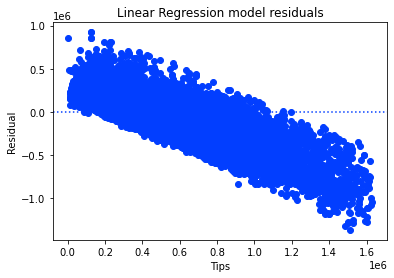

In [39]:
plot_residuals(y_train.taxvaluedollarcnt, y_train.taxvaluedollarcnt_pred_lm_1)

In [40]:
regression_errors(y_train.taxvaluedollarcnt, y_train.taxvaluedollarcnt_pred_lm_1)

ESS 722599501605918.9
MSE 55319150059.694664
SSE 1584119181109416.5
TSS 2306718682715335.5
RMSE 235200.23397032297


In [41]:
baseline_mean_errors(y_train.taxvaluedollarcnt)

MSE baseline 80553103880.26733
SSE baseline 2306718682715335.5
RMSE baseline 283818.78704600816


In [42]:
better_than_baseline(y_train.taxvaluedollarcnt, y_train.taxvaluedollarcnt_pred_lm_1)

The mode performs better than baseline.


#### Append to DataFrame

In [91]:
metric_df = metric_df.append({
    'model': 'OLS Regressor', 
    'RMSE_validate': rmse_validate,
    'r^2_validate': explained_variance_score(y_validate.taxvaluedollarcnt, y_validate.taxvaluedollarcnt_pred_lm_1)}, ignore_index=True)

In [92]:
metric_df

,model,RMSE_validate,r^2_validate
0,median_baseline,290400.566152,-2.220446e-16
1,OLS Regressor,237624.795724,3.196199e-01


### LassoLars

Now we will use the LassoLars model to estimate the `taxdollarvaluedollarcnt`.

In [44]:
# create the model object
lars = LassoLars(alpha=1)

# fit the model to our training data.
lars.fit(X_train_model, y_train.taxvaluedollarcnt)

# predict train
y_train['taxvaluedollarcnt_pred_lars'] = lars.predict(X_train_model)

# evaluate: rmse
rmse_train = mean_squared_error(y_train.taxvaluedollarcnt, y_train.taxvaluedollarcnt_pred_lars) ** (1/2)

# predict validate
y_validate['taxvaluedollarcnt_pred_lars'] = lars.predict(X_validate_model)

# evaluate: rmse
rmse_validate = mean_squared_error(y_validate.taxvaluedollarcnt, y_validate.taxvaluedollarcnt_pred_lars) ** (1/2)

print("RMSE for Lasso + Lars\nTraining/In-Sample: ", rmse_train, 
      "\nValidation/Out-of-Sample: ", rmse_validate)

RMSE for Lasso + Lars
Training/In-Sample:  235200.63303275532 
Validation/Out-of-Sample:  234804.39043575438


#### Evaluate LassoLars

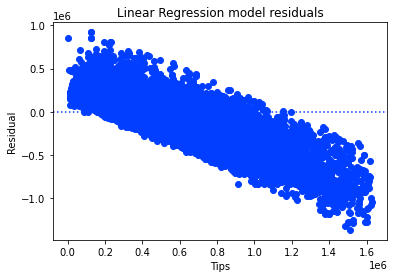

In [45]:
plot_residuals(y_train.taxvaluedollarcnt, y_train.taxvaluedollarcnt_pred_lars)

In [47]:
regression_errors(y_train.taxvaluedollarcnt, y_train.taxvaluedollarcnt_pred_lars)

ESS 720153899546428.6
MSE 55319337779.00883
SSE 1584124556639696.8
TSS 2304278456186125.5
RMSE 235200.63303275532


In [48]:
baseline_mean_errors(y_train.taxvaluedollarcnt)

MSE baseline 80553103880.26733
SSE baseline 2306718682715335.5
RMSE baseline 283818.78704600816


In [49]:
better_than_baseline(y_train.taxvaluedollarcnt, y_train.taxvaluedollarcnt_pred_lars)

The mode performs better than baseline.


#### Append to DataFrame

In [93]:
metric_df = make_metric_df(y_validate.taxvaluedollarcnt, y_validate.taxvaluedollarcnt_pred_lars,
               'lasso_alpha_1',
               metric_df)

In [94]:
metric_df

,model,RMSE_validate,r^2_validate
0,median_baseline,290400.566152,-2.220446e-16
1,OLS Regressor,237624.795724,3.196199e-01
2,lasso_alpha_1,234804.390436,3.195825e-01


### TweedieRegressor (GLM)

We use the TweedieRegressor model to predict `taxvaluedollarcnt`.

In [80]:
# create the model object
glm = TweedieRegressor(power=1, alpha=0.5)


# fit the model to our training data. We must specify the column in y_train, 
# since we have converted it to a dataframe from a series! 
glm.fit(X_train_model, y_train.taxvaluedollarcnt)

# predict train
y_train['taxvaluedollarcnt_pred_glm'] = glm.predict(X_train_model)

# evaluate: rmse
rmse_train = mean_squared_error(y_train.taxvaluedollarcnt, y_train.taxvaluedollarcnt_pred_glm) ** (1/2)

# predict validate
y_validate['taxvaluedollarcnt_pred_glm'] = glm.predict(X_validate_model)

# evaluate: rmse
rmse_validate = mean_squared_error(y_validate.taxvaluedollarcnt, y_validate.taxvaluedollarcnt_pred_glm) ** (1/2)

print("RMSE for GLM using Tweedie, power=1 & alpha=0.5\nTraining/In-Sample: ", rmse_train, 
      "\nValidation/Out-of-Sample: ", rmse_validate)

RMSE for GLM using Tweedie, power=1 & alpha=0.5
Training/In-Sample:  237876.19335666724 
Validation/Out-of-Sample:  237624.79572438452


#### Evaluate TweedieRegressor

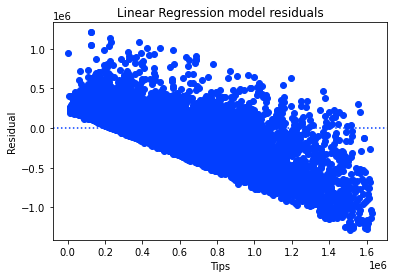

In [51]:
plot_residuals(y_train.taxvaluedollarcnt, y_train.taxvaluedollarcnt_pred_glm)

In [52]:
regression_errors(y_train.taxvaluedollarcnt, y_train.taxvaluedollarcnt_pred_glm)

ESS 772868692069053.5
MSE 56585083365.858536
SSE 1620370447264725.0
TSS 2393239139333778.5
RMSE 237876.19335666724


In [53]:
baseline_mean_errors(y_train.taxvaluedollarcnt)

MSE baseline 80553103880.26733
SSE baseline 2306718682715335.5
RMSE baseline 283818.78704600816


In [54]:
better_than_baseline(y_train.taxvaluedollarcnt, y_train.taxvaluedollarcnt_pred_glm)

The mode performs better than baseline.


#### Append to DataFrame

In [95]:
metric_df = make_metric_df(y_validate.taxvaluedollarcnt, y_validate.taxvaluedollarcnt_pred_glm,
               'GLM',
               metric_df)
metric_df

,model,RMSE_validate,r^2_validate
0,median_baseline,290400.566152,-2.220446e-16
1,OLS Regressor,237624.795724,3.196199e-01
2,lasso_alpha_1,234804.390436,3.195825e-01
3,GLM,237624.795724,3.031175e-01


### Polynomial Features

We use polynomial features to convert our DataFrames, so that we can run LinearRegression again.

In [55]:
# make the polynomial features to get a new set of features
pf = PolynomialFeatures(degree=2)

# fit and transform X_train_scaled
X_train_degree2 = pf.fit_transform(X_train_model)

# transform X_validate_scaled & X_test_scaled
X_validate_degree2 = pf.transform(X_validate_model)
X_test_degree2 =  pf.transform(X_test_model)

### LinearRegression, with Polynomial Regression

In [99]:
# create the model object
lm2 = LinearRegression(normalize=True)

# fit the model to our training data. We must specify the column in y_train, 
# since we have converted it to a dataframe from a series! 
lm2.fit(X_train_degree2, y_train.taxvaluedollarcnt)

# predict train
y_train['taxvaluedollarcnt_pred_lm2'] = lm2.predict(X_train_degree2)

# evaluate: rmse
rmse_train = mean_squared_error(y_train.taxvaluedollarcnt, y_train.taxvaluedollarcnt_pred_lm2) ** (1/2)

# predict validate
y_validate['taxvaluedollarcnt_pred_lm2'] = lm2.predict(X_validate_degree2)

# evaluate: rmse
rmse_validate = mean_squared_error(y_validate.taxvaluedollarcnt, y_validate.taxvaluedollarcnt_pred_lm2)

print("RMSE for Polynomial Model, degrees=2\nTraining/In-Sample: ", rmse_train, 
      "\nValidation/Out-of-Sample: ", rmse_validate)

RMSE for Polynomial Model, degrees=2
Training/In-Sample:  234641.69797035443 
Validation/Out-of-Sample:  54816370888.428925


#### Evaluation

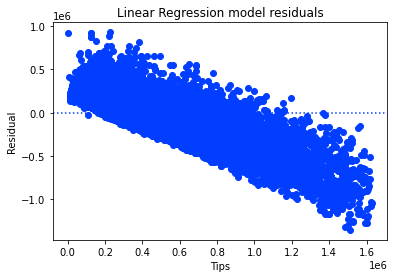

In [60]:
plot_residuals(y_train.taxvaluedollarcnt, y_train.taxvaluedollarcnt_pred_lm2)

In [61]:
regression_errors(y_train.taxvaluedollarcnt, y_train.taxvaluedollarcnt_pred_lm2)

ESS 730114264768634.1
MSE 55056726426.41103
SSE 1576604417946706.2
TSS 2306718682715340.5
RMSE 234641.69797035443


In [62]:
baseline_mean_errors(y_train.taxvaluedollarcnt)

MSE baseline 80553103880.26733
SSE baseline 2306718682715335.5
RMSE baseline 283818.78704600816


In [63]:
better_than_baseline(y_train.taxvaluedollarcnt, y_train.taxvaluedollarcnt_pred_lm2)

The mode performs better than baseline.


#### Add to DataFrame

In [100]:
metric_df = make_metric_df(y_validate.taxvaluedollarcnt, y_validate.taxvaluedollarcnt_pred_lm2,
               'quadratic',
               metric_df)

In [101]:
metric_df

,model,RMSE_validate,r^2_validate
0,median_baseline,290400.566152,-2.220446e-16
1,OLS Regressor,237624.795724,3.196199e-01
2,lasso_alpha_1,234804.390436,3.195825e-01
3,GLM,237624.795724,3.031175e-01
4,quadratic,234128.962088,3.234826e-01
5,quadratic,234128.962088,3.234826e-01


### Key Takeaways

 - All of our models perform better than the mean baseline model. 
 
 - The quadratic model has the lowest RMSE value. 
 
 - The quadratic model also has the highest $r^2$ value. 

## Evaluation 

### Comparing Results

In [55]:
y_train.head()

,taxvaluedollarcnt,taxvaluedollarcnt_pred_mean,taxvaluedollarcnt_pred_median,taxvaluedollarcnt_pred_lm_1,taxvaluedollarcnt_pred_lars,taxvaluedollarcnt_pred_glm,taxvaluedollarcnt_pred_lm2
8266,286663.0,408516.372149,350000.0,401322.531668,401783.154095,3.788081e+05,4.030899e+05
18949,64609.0,408516.372149,350000.0,383117.365578,382750.157803,3.718618e+05,3.777890e+05
22247,210212.0,408516.372149,350000.0,386088.515907,386476.827983,3.822273e+05,3.681258e+05
7526,237037.0,408516.372149,350000.0,503213.067521,502497.184452,4.719027e+05,5.195636e+05
17592,1094525.0,408516.372149,350000.0,974974.493716,973757.385733,1.186996e+06,1.043415e+06


### Plotting Actual v. Predicted Values

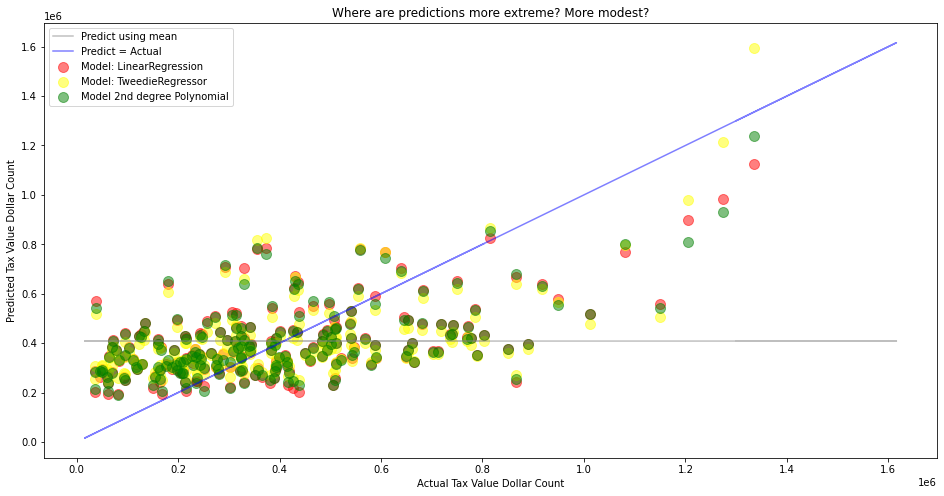

In [56]:
# y_validate.head()
plt.figure(figsize=(16,8))
plt.plot(y_validate.taxvaluedollarcnt, y_validate.taxvaluedollarcnt_pred_mean, alpha=.5, color="gray", label='Predict using mean')
plt.plot(y_validate.taxvaluedollarcnt, y_validate.taxvaluedollarcnt, alpha=.5, color="blue", label='Predict = Actual')

plt.scatter(y_validate.taxvaluedollarcnt[0:200], y_validate.taxvaluedollarcnt_pred_lm_1[0:200], 
            alpha=.5, color="red", s=100, label="Model: LinearRegression")
plt.scatter(y_validate.taxvaluedollarcnt[0:200], y_validate.taxvaluedollarcnt_pred_glm[0:200], 
            alpha=.5, color="yellow", s=100, label="Model: TweedieRegressor")
plt.scatter(y_validate.taxvaluedollarcnt[0:200], y_validate.taxvaluedollarcnt_pred_lm2[0:200], 
            alpha=.5, color="green", s=100, label="Model 2nd degree Polynomial")
plt.legend()
plt.xlabel("Actual Tax Value Dollar Count")
plt.ylabel("Predicted Tax Value Dollar Count")
plt.title("Where are predictions more extreme? More modest?")
plt.show()

### Residual Plots: Plotting the Errors in Predictions

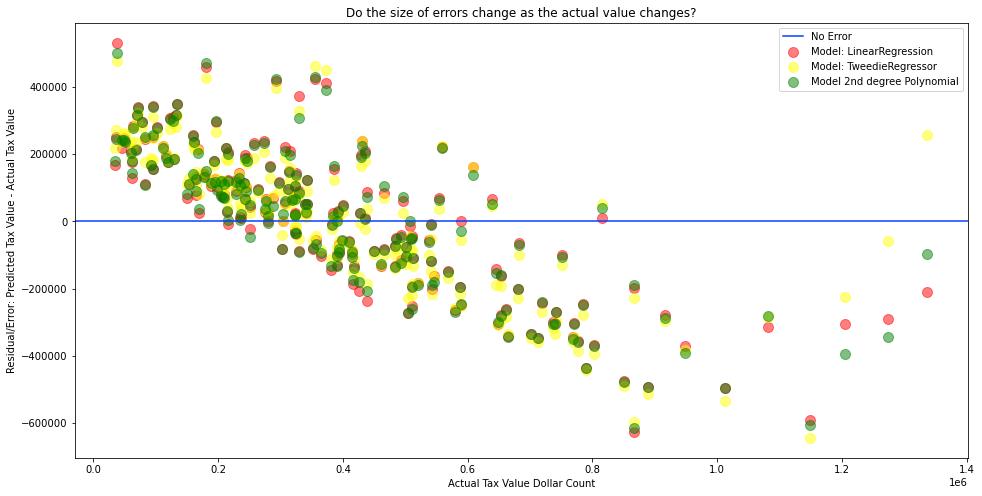

In [57]:
# y_validate.head()
plt.figure(figsize=(16,8))
plt.axhline(label="No Error")
plt.scatter(y_validate.taxvaluedollarcnt[0:200], y_validate.taxvaluedollarcnt_pred_lm_1[0:200]-y_validate.taxvaluedollarcnt[0:200], 
            alpha=.5, color="red", s=100, label="Model: LinearRegression")
plt.scatter(y_validate.taxvaluedollarcnt[0:200], y_validate.taxvaluedollarcnt_pred_glm[0:200]-y_validate.taxvaluedollarcnt[0:200], 
            alpha=.5, color="yellow", s=100, label="Model: TweedieRegressor")
plt.scatter(y_validate.taxvaluedollarcnt[0:200], y_validate.taxvaluedollarcnt_pred_lm2[0:200]-y_validate.taxvaluedollarcnt[0:200], 
            alpha=.5, color="green", s=100, label="Model 2nd degree Polynomial")
plt.legend()
plt.xlabel("Actual Tax Value Dollar Count")
plt.ylabel("Residual/Error: Predicted Tax Value - Actual Tax Value")
plt.title("Do the size of errors change as the actual value changes?")
plt.show()

### Histograms

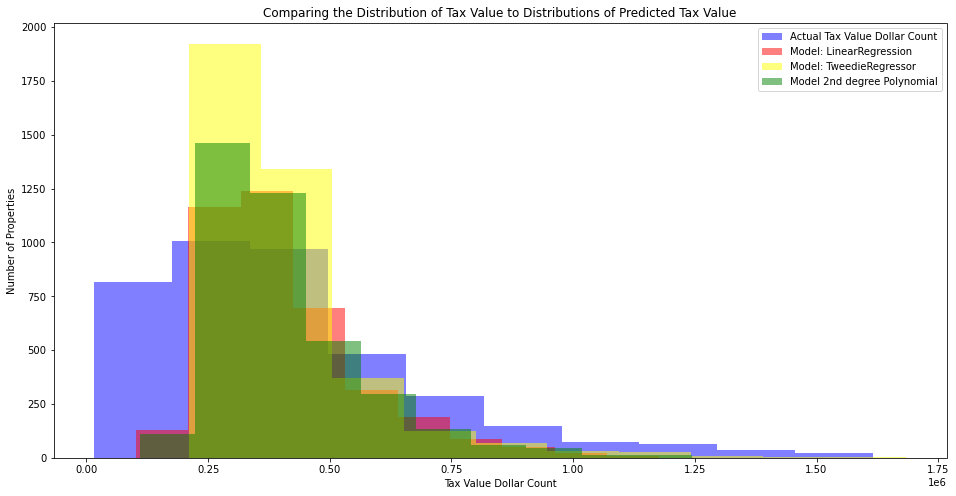

In [58]:
# plot to visualize actual vs predicted. 
plt.figure(figsize=(16,8))
plt.hist(y_validate.taxvaluedollarcnt, color='blue', alpha=.5, label="Actual Tax Value Dollar Count")
plt.hist(y_validate.taxvaluedollarcnt_pred_lm_1, color='red', alpha=.5, label="Model: LinearRegression")
plt.hist(y_validate.taxvaluedollarcnt_pred_glm, color='yellow', alpha=.5, label="Model: TweedieRegressor")
plt.hist(y_validate.taxvaluedollarcnt_pred_lm2, color='green', alpha=.5, label="Model 2nd degree Polynomial")
plt.xlabel("Tax Value Dollar Count")
plt.ylabel("Number of Properties")
plt.title("Comparing the Distribution of Tax Value to Distributions of Predicted Tax Value")
plt.legend()
plt.show()

### Model Selection and Out-of-Sample Evaluation

I select the Linear Regression Model with Polynomial Regression because this model has the lowest RMSE_validate score and the highest $r^2$ score. 

In [104]:
y_test = pd.DataFrame(y_test)
y_test.head()

,taxvaluedollarcnt
11810,117999.0
26555,428899.0
9090,518345.0
10565,579030.0
24800,459958.0


In [106]:
# predict on test
y_test['taxvaluedollarcnt_pred_lm2'] = lm2.predict(X_test_degree2)

In [107]:
# evaluate: rmse
rmse_test = mean_squared_error(y_test.taxvaluedollarcnt, y_test.taxvaluedollarcnt_pred_lm2)**(1/2)

print("RMSE for OLS Model using LinearRegression with Polynomial Regression\nOut-of-Sample Performance: ", rmse_test)

RMSE for OLS Model using LinearRegression with Polynomial Regression
Out-of-Sample Performance:  236137.39383676148


In [61]:
y_test.head()

,taxvaluedollarcnt,taxvaluedollarcnt_pred_glm
11810,117999.0,494494.093582
26555,428899.0,435699.807621
9090,518345.0,392731.130499
10565,579030.0,302704.007825
24800,459958.0,311099.296623


## County Level Tax Rates

On a separate note, we are also required to calculate the distribution of the tax rate for each county. 

In [73]:
zillow.head()

,bedroomcnt,bathroomcnt,calculatedfinishedsquarefeet,taxvaluedollarcnt,yearbuilt,taxamount,fips,tax_rate,counties
0,3.0,2.0,1125.0,289445.0,1974.0,3490.16,6059.0,0.012058,Orange County
1,3.0,2.0,1316.0,205123.0,1923.0,2627.48,6037.0,0.012809,Los Angeles
2,3.0,2.0,1458.0,136104.0,1970.0,2319.90,6037.0,0.017045,Los Angeles
3,3.0,2.0,1766.0,810694.0,1980.0,9407.01,6037.0,0.011604,Los Angeles
4,2.0,1.0,1421.0,35606.0,1911.0,543.69,6037.0,0.015270,Los Angeles


In [83]:
zillow_clean = zillow

In [84]:
zillow_clean.head()

,bedroomcnt,bathroomcnt,calculatedfinishedsquarefeet,taxvaluedollarcnt,yearbuilt,taxamount,fips
0,3.0,2.0,1125.0,289445.0,1974.0,3490.16,6059.0
1,3.0,2.0,1316.0,205123.0,1923.0,2627.48,6037.0
2,3.0,2.0,1458.0,136104.0,1970.0,2319.90,6037.0
3,3.0,2.0,1766.0,810694.0,1980.0,9407.01,6037.0
4,2.0,1.0,1421.0,35606.0,1911.0,543.69,6037.0


In [85]:
zillow_clean['tax_rate'] = zillow_clean['taxamount'] / zillow_clean['taxvaluedollarcnt']

In [86]:
zillow_clean.head()

,bedroomcnt,bathroomcnt,calculatedfinishedsquarefeet,taxvaluedollarcnt,yearbuilt,taxamount,fips,tax_rate
0,3.0,2.0,1125.0,289445.0,1974.0,3490.16,6059.0,0.012058
1,3.0,2.0,1316.0,205123.0,1923.0,2627.48,6037.0,0.012809
2,3.0,2.0,1458.0,136104.0,1970.0,2319.90,6037.0,0.017045
3,3.0,2.0,1766.0,810694.0,1980.0,9407.01,6037.0,0.011604
4,2.0,1.0,1421.0,35606.0,1911.0,543.69,6037.0,0.015270


We will remove outliers from the DataFrame so that we can effectively graph tax rates.

In [87]:
zillow_clean = remove_outliers(zillow_clean, 3, zillow_clean.columns)

Now we will find the min and max of tax rate so that we know what the bounds of our graph should be. 

In [88]:
zillow_clean.tax_rate.min()

0.0062223923670416395

In [89]:
zillow_clean.tax_rate.max()

0.01889615023857102

We replace the FIPS code with the county name so that that graph is easier to interpret.

In [90]:
counties = {6037.0: "Los Angeles", 6059.0: "Orange County", 6111.0: "Ventura" }
zillow_clean['counties']=zillow_clean.fips.replace(counties)

(0.00621, 0.019)

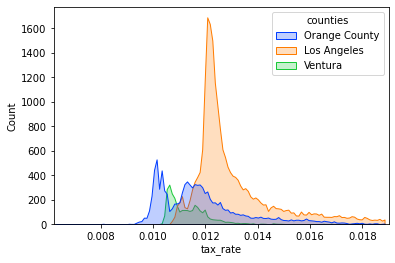

In [91]:
tax_rate_by_county = sns.histplot(data = zillow_clean, x = "tax_rate", hue = "counties", palette = 'bright', element = "poly")

plt.xlim(0.00621, 0.019) 

### Key Takeaways

 - It appears that Los Angeles tends to have the highest tax rate, followed by Orange County, then Ventura. 